## Note: 

The cells under every question are inter-related, and would ideally provide the correct outcome if run sequentially.\
The names of variables are repeated in many questions, but differ in the context of the question.

### Question 1

In Matrix multiplication, between two matrices $A, B$ of size $(n, k)$ and $(k, m)$ respectively, the resulting matrix $C$ will be of size $(n, m)$.
Matrix Multiplication can be represented as:
$ \forall i \in [0, \cdots , n)$ and $ \forall j \in [0, \cdots , m)$: $C[i][j]$ = $ \sum_{l=0}^{k-1} A[i][l] \times B[l][j] $ 

Therefore, number of:

- Multiplication: 
    - Each element in the resultant matrix, is formed by performing $k$ multiplications and summing them over.
    - And the resultant matrix has $n \times m $ such elements. Therefore, total number of multiplications is equal to $(n\times m \times k)$.

- Addition: 
    - Each element in the resultant matrix, is formed by performing $k - 1$ multiplications.
    - And the resultant matrix has $n \times m $ such elements. Therefore, total number of additions is equal to $\left( n\times m \times (k-1) \right)$.

### Question 2

In [1]:
import time
import random as rd

def generate_matrix(i, j):
    mat = []
    for _ in range(i):
        row_arr = []
        for __ in range(j):
            row_arr.append(rd.randint(-2000000000, 2000000000))
        mat.append(row_arr)
    return mat

# arr1 = [[28, 32, 17, 89, 22, 50, 68, 39, 24, 69],
#         [508, 464, 366, 216, 227, 530, 534, 464, 549, 18],
#         [166, 251, 17, 779, 485, 883, 721, 801, 377, 416],
#         [343, 200, 359, 164, 901, 123, 80, 721, 199, 345],
#         [459, 875, 695, 429, 599, 374, 741, 884, 903, 162],
#         [142, 518, 767, 736, 914, 232, 44, 492, 704, 502],
#         [555, 14, 124, 550, 608, 239, 897, 313, 240, 198]
#         ]

# arr2 = [[115, 814, 490, 436, 523, 101],
#         [549, 535, 205, 609, 574, 639],
#         [1761, 1621, 4809, 4923, 2323, 26],
#         [1006, 2723, 188, 3512, 1621, 770],
#         [828, 86, 318, 3902, 3445, 341],
#         [3083, 2593, 1747, 2263, 856, 1420],
#         [4208, 3294, 2199, 1103, 2231, 701],
#         [3315, 2076, 1397, 1093, 3425, 1432],
#         [2993, 3538, 4491, 2801, 964, 3053],
#         [1689, 490, 4753, 2555, 1817, 605]
#         ]

# n = len(arr1)
# k = len(arr1[0])
# m = len(arr2[0])

print("Enter the values for n, k, m:")
n = int(input())
k = int(input())
m = int(input())

arr1, arr2 = generate_matrix(n, k), generate_matrix(k, m)

start_time = time.time() 

result =[]

for i in range(n):
  row = []
  for j in range(m):
    val = sum(arr1[i][l] * arr2[l][j] for l in range(k))
    row.append(val)
  result.append(row)

end_time = time.time()
time_val = end_time - start_time

print("The runtime using nested lists: ", time_val)

Enter the values for n, k, m:
10
10
10
The runtime using nested lists:  0.0006198883056640625


In [2]:
# Note for the sake of comparision the (Please run the cell above before running this cell) 
# as arr1 and arr2 are defined above. Another appraoch could be do several iterations using random samples and comparing the average

import numpy as np

arr1 = np.array(arr1)

arr2 = np.array(arr2)

start_time = time.time()
result = np.matmul(arr1, arr2)

time_val = time.time() - start_time

print("The runtime using nested lists: ", time_val)

The runtime using nested lists:  4.982948303222656e-05


From the above timing values we can conclude that numpy is faster is compared to the nested list implementation. The reason can be related to the fact that NumPy is built of highly optimized (low-level language) C library. In Numpy, the array elements are of the same type (in contrast to the different types supported in Python lists) and thus provides benefits of locality of reference (as all the elements will be of same datatype hence will occupy the same amount of memory, which speeds up the memory accesses). Also, better performance can be seen when dealing with large amounts of data. \

### Question 3

In [1]:
import numpy as np
import time
import random as rd

def get_timeval(func, inp):
    start_time = time.time()
    val = func(inp)
    return (time.time() - start_time), val

def swap_ls(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

# Method - 1: Implementation similar to Selection Sort, (O(n^2))
# The below implementation has been used for cases involving duplicate elements 
def find_median(arr):
    if len(arr)==0: 
        raise Exception("Provide a list with atleast one element")
    cpy_arr = arr.copy()
    
    last_ele = len(cpy_arr)
    
#     max_ind = 0
    
    for _ in range(int(len(cpy_arr)/2) + 1):
        max_ind =0
        for i in range(last_ele):
            max_ind = i if cpy_arr[i] > cpy_arr[max_ind] else max_ind
            
        swap_ls(cpy_arr, max_ind, last_ele - 1)
        last_ele = last_ele - 1
    
    mid = int(len(cpy_arr) / 2)
    return (cpy_arr[mid - 1] + cpy_arr[mid])/2 if (len(cpy_arr)%2 == 0) else cpy_arr[mid]
    
# Method-2: Sort and find median (O(nlog(n)))
# other possible methods: QuickSelect (avg-case: O(n), worstcase: O(n^2))
def find_median_2(arr):
    sort_arr = sorted(arr)
    
    mid_ind = int(len(arr) / 2)
    
    return (sort_arr[mid_ind - 1] + sort_arr[mid_ind])/2 if (len(arr)%2 == 0) else sort_arr[mid_ind]


#size = 10,000 
arr = [6740, 7500, 2267, 6384, 7252, 6003, 1598, 6003, 8714, 7170, 6138, 5818, 7557, 9213, 9240, 4995, 4824, 6725, 7342, 8386, 7463, 4887, 1683, 1559, 9034, 6683, 6550, 7148, 2448, 487, 457, 8853, 2667, 5758, 8714, 5956, 7099, 2165, 404, 2818, 6168, 2678, 4326, 3007, 2738, 5763, 4617, 303, 7479, 8590, 4602, 9704, 390, 3676, 7150, 6740, 5029, 9805, 2880, 1671, 9953, 7870, 2711, 7405, 456, 6998, 4435, 8363, 2137, 8797, 3727, 8971, 198, 4818, 5472, 2127, 8675, 4198, 9336, 5485, 2019, 79, 5097, 5399, 9272, 9328, 2842, 4788, 3699, 8966, 4449, 9091, 9254, 7588, 4652, 1036, 3641, 7759, 4612, 8531, 3693, 4213, 4281, 609, 1235, 3616, 5001, 2716, 7237, 6654, 3187, 1764, 2773, 5408, 3876, 1723, 9038, 7253, 7095, 6775, 387, 197, 2665, 8517, 8987, 1217, 1768, 13, 6389, 3517, 1376, 2353, 5783, 3139, 2965, 4881, 4848, 5288, 2419, 3482, 5066, 6585, 7788, 4994, 9567, 6005, 8074, 6295, 6852, 8611, 8251, 7085, 800, 7098, 8847, 5759, 7873, 8108, 7846, 3224, 6840, 4071, 4411, 5915, 7927, 4490, 9039, 9935, 1811, 665, 5499, 1835, 9188, 1275, 1334, 2215, 9127, 2249, 4484, 2250, 6964, 678, 3303, 2334, 9890, 6645, 8985, 9552, 2934, 1922, 5105, 709, 1840, 4459, 4503, 6490, 3953, 3135, 4467, 7190, 9492, 4547, 5932, 2169, 5545, 5473, 2791, 3745, 487, 1964, 6842, 3455, 6457, 6357, 3903, 2391, 5580, 5778, 6052, 6226, 3194, 571, 805, 7310, 7337, 7929, 4137, 9929, 4651, 1817, 7946, 7201, 8922, 8817, 8039, 5507, 4722, 2045, 6754, 3314, 3387, 9958, 2746, 2999, 4677, 7237, 4946, 6928, 1646, 1789, 656, 3840, 9418, 7815, 343, 1304, 9366, 4982, 1000, 870, 5853, 9861, 1928, 5055, 4788, 1152, 6408, 533, 1390, 2270, 2904, 9160, 3320, 9241, 4123, 6098, 4364, 6610, 5098, 3568, 3856, 6198, 1474, 5725, 6097, 7647, 6489, 1385, 9209, 2136, 9910, 6957, 8963, 2523, 3657, 5132, 5057, 9173, 4117, 2970, 6721, 3232, 6635, 4322, 1407, 2177, 808, 908, 8131, 2605, 9486, 4341, 9890, 4013, 2758, 4248, 3555, 7231, 6576, 5094, 4332, 4857, 7142, 4875, 3269, 6958, 5151, 1048, 8027, 1644, 8534, 7453, 1809, 9977, 2549, 9469, 1177, 9209, 1966, 1994, 4868, 9312, 8220, 8148, 3562, 7668, 8788, 261, 690, 8925, 3656, 4088, 8228, 5744, 9850, 9458, 4332, 2160, 8323, 3830, 3679, 233, 4940, 2091, 1345, 4961, 8218, 1690, 1216, 6100, 5240, 1153, 5218, 4069, 8015, 4480, 7639, 4091, 1646, 9723, 4657, 1987, 8298, 3635, 6445, 5171, 9248, 8801, 7119, 972, 5303, 9839, 6687, 3823, 1871, 3851, 7900, 1641, 8550, 3545, 7328, 3356, 4155, 6849, 4841, 5207, 3616, 6914, 1782, 9496, 3696, 2544, 4166, 4747, 9592, 1673, 5000, 847, 5269, 7417, 4127, 8564, 8338, 7383, 346, 8789, 3794, 7421, 116, 3314, 9600, 9681, 9685, 9109, 4576, 9330, 2948, 196, 9856, 3493, 9183, 9373, 1855, 7706, 3973, 6260, 8590, 4816, 6008, 1092, 5184, 7548, 5615, 3552, 7944, 4760, 2317, 8502, 5206, 970, 6407, 9012, 3014, 6017, 8642, 9218, 3619, 894, 9233, 5654, 2206, 4037, 7589, 4588, 8505, 6523, 158, 9516, 4685, 7685, 3247, 696, 6749, 6747, 7708, 5129, 7568, 9907, 3546, 5832, 1904, 4675, 8047, 7610, 8235, 6285, 2892, 9672, 7003, 157, 169, 6455, 4148, 3431, 3689, 2742, 783, 2688, 1050, 2093, 9135, 5352, 4366, 2966, 6751, 8999, 1164, 9732, 3556, 8093, 5122, 2900, 3654, 8324, 7684, 8538, 8364, 3915, 8742, 184, 530, 2906, 1830, 8791, 4400, 6787, 9963, 2832, 1100, 5393, 3265, 3604, 6063, 248, 2622, 3541, 4102, 9711, 6209, 4269, 7447, 95, 1921, 9725, 2985, 1068, 8091, 1858, 5534, 3776, 7531, 2757, 2513, 5456, 2967, 4345, 3004, 897, 371, 6781, 6797, 4889, 6320, 2182, 9329, 6796, 940, 4799, 9285, 8323, 473, 1382, 984, 1889, 6454, 8132, 3626, 7954, 2853, 2302, 2369, 4479, 3907, 8686, 1516, 3693, 3976, 7209, 6642, 3994, 6767, 7752, 3260, 6625, 5087, 1471, 212, 2585, 7424, 1478, 4151, 9867, 2268, 8654, 1320, 8248, 7941, 6032, 5626, 3880, 9411, 8799, 9236, 3845, 2898, 9582, 6965, 6379, 5459, 8592, 1090, 119, 6884, 4522, 4642, 1442, 9815, 5812, 7329, 6933, 122, 2634, 6775, 7741, 3983, 8793, 8264, 9475, 8314, 8288, 9336, 2553, 7912, 690, 6336, 3337, 9399, 380, 241, 6809, 3330, 4314, 9747, 9793, 4045, 4543, 432, 8003, 923, 1356, 2829, 6410, 268, 1453, 2018, 2301, 2567, 8275, 8664, 818, 4819, 8397, 8773, 3129, 9382, 8952, 6264, 8833, 3740, 5966, 5376, 8724, 7731, 7980, 4321, 576, 2101, 9177, 5527, 1658, 6550, 9329, 2687, 8893, 3979, 5801, 7176, 7782, 4313, 5170, 6998, 7121, 3639, 6730, 5130, 3248, 8750, 7658, 8508, 8819, 8318, 7308, 5858, 4076, 1687, 3533, 4484, 8101, 9128, 7975, 2263, 709, 1667, 2548, 5874, 6816, 4999, 5530, 3007, 5854, 9064, 4731, 3739, 6321, 6282, 496, 8026, 1803, 9504, 2109, 2837, 6510, 3489, 3773, 8966, 8955, 6709, 2624, 2688, 9046, 2728, 70, 7740, 6266, 1573, 9831, 4312, 8648, 7258, 722, 5172, 5064, 5848, 2422, 2054, 9775, 2710, 7318, 3978, 4182, 6023, 1770, 7860, 8594, 2420, 3256, 1294, 3121, 8343, 9988, 222, 8116, 6130, 3064, 9034, 4706, 447, 36, 8401, 4901, 5043, 8756, 7056, 6301, 2883, 1209, 6768, 4889, 5617, 9369, 1573, 5011, 2163, 5636, 5839, 1501, 8006, 4923, 6107, 230, 5270, 3258, 8436, 6608, 9273, 5496, 4916, 5086, 2265, 4764, 614, 6669, 4082, 9988, 814, 8927, 1441, 5548, 9572, 2407, 9263, 3255, 7518, 6026, 3932, 1261, 7495, 8292, 5411, 7234, 6943, 8188, 1627, 6921, 1183, 5167, 4133, 8290, 8594, 5647, 8874, 1131, 4252, 3626, 4537, 9597, 7996, 2853, 5227, 2352, 9813, 8, 8253, 4918, 5673, 4253, 3593, 29, 5235, 3375, 820, 8295, 6137, 2060, 5682, 519, 5703, 7420, 6827, 2466, 2883, 3504, 9525, 8998, 1332, 2507, 4795, 4967, 2020, 9143, 6402, 1573, 2060, 2584, 2934, 9602, 7433, 7422, 6465, 2742, 563, 8062, 3459, 7694, 5680, 1338, 9829, 8893, 6234, 1542, 8432, 7340, 5072, 6970, 3702, 7196, 7526, 759, 5258, 3799, 482, 6725, 2232, 1952, 6879, 3356, 3496, 3370, 4755, 2023, 3320, 2227, 9374, 3996, 1132, 3885, 7358, 7035, 291, 1825, 3906, 8262, 3688, 7544, 3752, 7865, 5742, 7341, 1641, 4663, 1770, 6709, 8589, 5181, 5112, 8294, 9085, 2966, 4745, 99, 1346, 1145, 2253, 5609, 7910, 1175, 3953, 2229, 475, 3519, 4496, 6899, 875, 5565, 9173, 1992, 3661, 5021, 1718, 9649, 6801, 7682, 6024, 9056, 9838, 52, 3569, 6426, 118, 1626, 3899, 542, 8008, 2171, 9508, 6083, 8449, 133, 2879, 8884, 7718, 6217, 614, 2166, 5873, 2766, 4733, 4217, 8086, 1128, 6449, 3401, 6258, 3163, 624, 1508, 2554, 1738, 7889, 1704, 6571, 2491, 5190, 7667, 6834, 5498, 8941, 5033, 9580, 811, 9599, 7807, 932, 8682, 10, 6859, 4992, 9218, 7676, 3154, 8467, 6077, 3137, 6208, 2932, 7023, 8656, 684, 6939, 2857, 5101, 9566, 2498, 8626, 3533, 9122, 5087, 5338, 876, 8624, 8138, 3163, 8209, 2475, 6298, 212, 6911, 7619, 4982, 3488, 2556, 6163, 8579, 7052, 9911, 8415, 704, 9292, 4990, 7563, 8089, 7547, 9834, 2643, 6108, 5096, 8398, 3136, 7751, 8805, 1514, 7957, 2838, 6102, 9701, 4610, 9628, 3276, 5015, 7494, 712, 6518, 6248, 4031, 4616, 1373, 3967, 4187, 7316, 4445, 6083, 5159, 5192, 1357, 5059, 4040, 3996, 4879, 7875, 6058, 6812, 4397, 2598, 622, 4485, 1179, 269, 8964, 9047, 7646, 9286, 3788, 7269, 482, 5343, 6759, 9324, 3259, 4545, 4785, 3840, 6787, 3047, 5951, 1306, 5255, 1235, 865, 6787, 2564, 3935, 7415, 6997, 947, 4422, 4313, 5908, 975, 8930, 486, 2294, 5175, 7980, 8946, 8914, 5617, 8451, 4076, 4413, 7184, 8405, 4403, 4549, 2978, 4059, 6483, 5801, 8572, 9460, 9498, 5220, 8310, 6494, 9214, 8978, 4318, 803, 4659, 9361, 9720, 6646, 7323, 6446, 5846, 7638, 2755, 5354, 3573, 8083, 2750, 1921, 6563, 1218, 846, 9188, 9800, 1404, 771, 2590, 2201, 8214, 479, 8830, 2033, 919, 1266, 2146, 5930, 9818, 7968, 3590, 7688, 5078, 2098, 7962, 1435, 2278, 60, 7069, 2357, 5739, 9089, 222, 5185, 2353, 2243, 8539, 1401, 441, 7384, 7682, 7843, 2442, 5177, 3156, 2637, 5523, 3534, 7307, 5151, 1913, 8306, 6512, 4192, 4085, 6493, 8922, 7475, 7276, 7741, 6835, 4839, 8986, 168, 6191, 1067, 1996, 4808, 9943, 4066, 5669, 8901, 1569, 823, 9985, 15, 5408, 6963, 5550, 1267, 4449, 780, 8700, 7994, 5110, 7252, 6272, 2873, 7098, 1856, 1115, 901, 2243, 7337, 9596, 656, 3963, 6361, 7254, 7702, 4862, 7715, 4262, 5295, 846, 2304, 5804, 3370, 4363, 2366, 6346, 2333, 1942, 9816, 2696, 6969, 4994, 5261, 8924, 1149, 7063, 9546, 4179, 5414, 4515, 2037, 4117, 9287, 5103, 9148, 5746, 981, 3299, 4813, 8599, 8888, 4842, 10, 2439, 4075, 7901, 7480, 9862, 6188, 9511, 6378, 1404, 6318, 7801, 2874, 7523, 1554, 2063, 2993, 8472, 7887, 3472, 911, 3960, 2752, 8296, 6074, 5410, 3848, 1629, 4513, 7242, 3085, 111, 5148, 533, 2445, 1094, 6902, 7271, 5772, 7325, 521, 7840, 3531, 2816, 2394, 4900, 4259, 6967, 9332, 2246, 1626, 7858, 446, 2432, 6481, 6700, 1458, 5866, 5101, 6014, 6308, 610, 4388, 9561, 3405, 7649, 174, 813, 1021, 2335, 4156, 2209, 7676, 777, 839, 5628, 2354, 3374, 8008, 7340, 3448, 4133, 3368, 1777, 3676, 1626, 307, 3443, 6330, 6845, 1907, 7013, 5040, 3824, 3570, 9208, 5969, 9150, 7929, 7487, 4123, 9594, 6808, 1920, 6701, 9286, 2564, 6014, 165, 3220, 8911, 6675, 3817, 578, 7595, 952, 1261, 1108, 3427, 3813, 822, 1000, 1426, 9778, 194, 3611, 1793, 9329, 8302, 759, 9388, 4003, 4582, 3834, 4100, 9777, 4568, 6639, 3938, 2271, 3662, 2531, 7332, 9898, 1404, 1102, 9677, 8451, 1998, 3787, 6295, 7676, 4500, 3554, 3982, 1149, 949, 8556, 2513, 5099, 8713, 3435, 7075, 4913, 5855, 1279, 9818, 3036, 2025, 16, 7052, 517, 9814, 1327, 8726, 2154, 4156, 9757, 4285, 3012, 3237, 6987, 3658, 9787, 68, 5516, 8872, 2700, 4544, 429, 4463, 7104, 6126, 7510, 9004, 3167, 9993, 8772, 7331, 3192, 1357, 8122, 6597, 693, 2228, 179, 8362, 390, 2118, 8338, 6036, 6477, 6048, 444, 7063, 6620, 56, 9037, 6212, 5174, 6341, 3869, 6849, 3144, 9275, 7134, 4648, 5231, 6406, 2264, 8556, 6530, 4449, 5648, 7720, 5751, 3102, 4383, 8380, 1669, 1132, 2339, 4947, 1014, 6707, 4582, 685, 5977, 848, 8781, 3756, 8170, 3357, 6954, 5096, 7389, 198, 1011, 2090, 468, 7467, 653, 2671, 4539, 4572, 6526, 9415, 7691, 3299, 7359, 6214, 2371, 2314, 4554, 6035, 1959, 4538, 6027, 8541, 3882, 3513, 9785, 1532, 7027, 9424, 2563, 6917, 1433, 8319, 6396, 610, 7729, 1082, 8537, 5836, 6881, 5967, 9524, 9037, 4708, 528, 804, 4274, 7631, 2193, 8183, 1923, 7674, 4795, 746, 1833, 4653, 3501, 1991, 8951, 2815, 3145, 1917, 6042, 1161, 2812, 8887, 761, 7536, 546, 9410, 5175, 7485, 1444, 6824, 7035, 8516, 8163, 954, 5558, 4634, 3828, 2777, 2249, 9152, 5657, 2306, 9552, 6553, 7828, 5310, 8681, 6925, 5422, 4476, 5695, 9248, 41, 2134, 8834, 8476, 9059, 4444, 2299, 9964, 3967, 1219, 2048, 631, 4761, 7430, 506, 5786, 7851, 3919, 1449, 7702, 599, 8824, 3489, 6546, 372, 3172, 9305, 5817, 3064, 7614, 3800, 8320, 5710, 8838, 5349, 3143, 3207, 1382, 1362, 3783, 9682, 114, 5507, 7309, 6889, 4285, 7588, 4032, 952, 7895, 8448, 3786, 3376, 4754, 3483, 3320, 6894, 5284, 6924, 4899, 3909, 805, 7552, 3181, 4849, 9712, 9837, 5459, 9386, 573, 9704, 9094, 8607, 305, 4743, 7029, 7066, 2659, 8609, 4659, 8845, 5973, 5627, 1233, 5699, 4199, 9656, 4215, 929, 5794, 5151, 7426, 9847, 1253, 2336, 7033, 7967, 8951, 2871, 4928, 3231, 9360, 5331, 9234, 4693, 614, 1852, 5248, 1999, 8652, 2134, 5137, 6340, 1133, 8157, 8084, 5554, 2511, 4780, 1859, 88, 3776, 5135, 8797, 8065, 1358, 7388, 9648, 2227, 2506, 9053, 756, 5363, 2183, 3504, 9666, 3422, 2486, 785, 3542, 1141, 5079, 4542, 3794, 1870, 31, 7576, 3500, 4720, 6648, 5739, 5178, 1930, 5657, 5750, 8850, 2273, 9825, 6471, 7499, 8511, 6785, 4630, 5750, 3203, 7676, 5532, 3347, 8337, 8621, 2710, 6904, 5427, 7595, 3099, 447, 3374, 457, 3668, 3978, 479, 6684, 2933, 5953, 377, 8877, 6108, 1796, 7704, 1956, 2292, 1006, 2536, 7890, 6567, 4984, 9589, 8661, 6734, 2391, 6240, 8046, 7229, 78, 4501, 384, 2438, 643, 8555, 4663, 9245, 1030, 1899, 723, 9069, 7922, 7400, 5985, 5716, 3791, 6035, 4769, 5653, 9768, 3920, 4124, 9144, 6452, 3502, 2369, 1702, 3362, 3912, 1191, 4413, 8420, 5442, 3086, 6630, 7748, 4241, 510, 7863, 875, 4945, 5029, 9625, 8325, 1, 9515, 5802, 7000, 2205, 1818, 2921, 7276, 6806, 8104, 3042, 653, 6119, 9928, 2668, 9589, 8894, 2668, 7673, 4993, 424, 2263, 3640, 2817, 9021, 7254, 1679, 5180, 9156, 269, 4164, 4475, 9586, 8305, 7889, 385, 3933, 2496, 4566, 158, 5365, 8355, 4113, 917, 7751, 3162, 5079, 4589, 3539, 9680, 934, 194, 6585, 7400, 4559, 6309, 5241, 4041, 8196, 9196, 9538, 4116, 6265, 5630, 3514, 1186, 8850, 8010, 4927, 525, 9486, 664, 2979, 6685, 9437, 9845, 5034, 7876, 7069, 5405, 3830, 6395, 3965, 2022, 8496, 2971, 732, 8890, 7422, 8037, 237, 5493, 6822, 8880, 3425, 4491, 2601, 8445, 5600, 3075, 7733, 3010, 371, 4823, 537, 7760, 3187, 9810, 6078, 6238, 4656, 9025, 3547, 8601, 3237, 6627, 7208, 9964, 5526, 7055, 9787, 7738, 2730, 6674, 1031, 5817, 6087, 5222, 5342, 4478, 3401, 8605, 8130, 8289, 2481, 6308, 1165, 5690, 3819, 4189, 7747, 8755, 4697, 1430, 769, 6721, 8004, 934, 3128, 9495, 4642, 7803, 4913, 5566, 9036, 5877, 8419, 8889, 6079, 3458, 7533, 3752, 4367, 637, 1292, 1746, 48, 4440, 5387, 9260, 3997, 9206, 6708, 4000, 4504, 1040, 8004, 1806, 980, 3083, 2008, 7969, 332, 9165, 2562, 4364, 8230, 4254, 9335, 9061, 1757, 4930, 9507, 4966, 9493, 1192, 6123, 1920, 1399, 381, 3051, 2045, 9578, 1525, 5704, 5739, 7125, 1058, 77, 4901, 943, 9933, 1061, 7643, 9372, 6312, 5375, 3281, 5997, 677, 8085, 4210, 1801, 8092, 5805, 8664, 3808, 9085, 4336, 8161, 6153, 6420, 7137, 877, 8, 7699, 8039, 5146, 8457, 8603, 489, 4349, 2345, 7823, 1179, 7979, 2288, 9864, 2970, 6580, 6739, 7138, 1978, 9354, 8801, 8942, 9281, 5283, 3912, 7003, 6578, 2821, 3386, 9709, 1437, 2806, 1877, 7615, 9012, 3025, 418, 1248, 2463, 2362, 8760, 2607, 8094, 7700, 2865, 3015, 6163, 2109, 284, 6092, 2302, 5170, 7722, 7911, 9246, 9761, 8369, 704, 1297, 709, 8331, 2479, 7245, 7626, 7256, 9001, 4380, 7753, 8775, 874, 6637, 1104, 4787, 963, 6810, 4203, 1101, 6958, 7502, 987, 2730, 2703, 422, 5808, 3607, 6583, 9220, 4322, 1846, 7642, 2924, 4473, 3701, 6184, 4199, 740, 9432, 9563, 8632, 7372, 4306, 5388, 7531, 4821, 9316, 75, 8146, 3760, 6160, 907, 4850, 1066, 9100, 2894, 5723, 2128, 9492, 6985, 5206, 6951, 9706, 4856, 870, 571, 190, 847, 3427, 8012, 8895, 9177, 7618, 4357, 2067, 5470, 182, 2686, 7905, 5622, 1399, 8571, 237, 6444, 9472, 945, 4795, 8553, 561, 5914, 3318, 7645, 9987, 8985, 4163, 9898, 5520, 555, 4357, 3637, 4200, 8987, 2320, 2277, 5388, 1595, 6799, 4729, 3603, 8375, 2783, 6564, 678, 7557, 2371, 4833, 9583, 9335, 3731, 8299, 4919, 8848, 136, 908, 4921, 7519, 1493, 3896, 2704, 8215, 159, 4724, 4950, 1755, 8880, 5675, 5583, 3164, 835, 505, 8382, 9176, 3092, 4273, 9394, 8259, 8566, 708, 2639, 941, 9011, 4016, 1512, 8922, 2333, 1355, 6268, 8259, 8192, 903, 8098, 5445, 9156, 6502, 9778, 9172, 311, 5141, 1064, 251, 2536, 9849, 953, 7654, 1628, 3668, 699, 632, 446, 1066, 3984, 9890, 189, 3168, 5426, 7675, 4367, 4960, 1395, 2276, 5262, 3250, 1974, 4282, 4952, 1422, 8430, 9834, 2456, 1330, 2311, 9319, 2417, 2543, 9037, 5170, 3842, 8596, 667, 6418, 9534, 5053, 6930, 7188, 9883, 3192, 1433, 2603, 5697, 301, 5604, 4743, 3687, 3846, 4785, 3183, 119, 8417, 3027, 7556, 2056, 446, 4060, 3430, 8345, 2310, 9202, 1551, 8446, 7612, 8459, 8777, 2785, 7151, 5238, 2017, 2020, 7749, 8968, 650, 4332, 1678, 3945, 2073, 7796, 7613, 1663, 6551, 2366, 8540, 2700, 1908, 9432, 983, 7794, 7857, 9545, 8828, 9400, 2409, 4112, 4400, 6685, 3794, 6513, 2686, 5891, 7900, 2395, 6163, 6076, 6054, 3256, 1887, 4758, 1019, 3061, 805, 94, 5258, 6204, 7444, 235, 6055, 446, 4728, 6249, 6360, 590, 4908, 1615, 3316, 7831, 6028, 1473, 9137, 8709, 2580, 5093, 121, 2839, 2024, 9226, 9063, 6212, 1781, 2866, 8435, 6638, 8861, 587, 9208, 202, 2109, 5217, 2958, 658, 2090, 594, 6130, 3133, 5959, 2946, 2914, 5410, 8238, 6922, 2684, 4920, 3021, 8910, 1156, 6503, 9158, 3316, 8452, 5856, 6920, 9921, 2667, 6600, 4798, 7902, 3269, 4699, 2484, 9501, 2708, 3458, 9814, 610, 5858, 7169, 2729, 466, 442, 5956, 6638, 5239, 8133, 3150, 9275, 1313, 6210, 719, 319, 6736, 7916, 1832, 1082, 7252, 7799, 2208, 396, 3992, 75, 5459, 1928, 8242, 6980, 3144, 2418, 7663, 5825, 2633, 6826, 1788, 5549, 7378, 5516, 1641, 9545, 273, 8057, 5559, 3210, 9714, 4517, 8267, 7855, 2747, 896, 5579, 5185, 9396, 8721, 209, 6570, 829, 6638, 3949, 5209, 7795, 4646, 3371, 9014, 1623, 9787, 6708, 2345, 6000, 4649, 9609, 1361, 3154, 9753, 2251, 9520, 2555, 9229, 8679, 2205, 1008, 222, 611, 79, 4663, 6033, 6113, 3867, 8451, 7128, 1151, 5773, 3416, 6480, 7511, 7503, 8917, 5425, 1519, 2438, 264, 7291, 563, 4663, 774, 432, 1581, 5828, 2343, 7727, 705, 4580, 4842, 3636, 1977, 8840, 9313, 8816, 3367, 3914, 5498, 7866, 6037, 2857, 9758, 8644, 4455, 1724, 2307, 8287, 8834, 6165, 7171, 1387, 267, 3734, 9384, 2879, 8787, 6610, 7863, 6710, 9051, 4306, 7355, 6799, 7377, 3767, 5395, 3352, 1591, 5137, 4202, 4221, 5413, 9368, 8695, 928, 7213, 3755, 5404, 7755, 7911, 2919, 7617, 2334, 8747, 2127, 9322, 2534, 8995, 1635, 5805, 9260, 2779, 1534, 224, 6867, 9882, 6800, 7231, 8400, 3391, 4221, 5289, 1785, 1790, 9339, 6638, 507, 8581, 1792, 4801, 2908, 2297, 1569, 4106, 4758, 7955, 2913, 6546, 3328, 5666, 3850, 5848, 6134, 8570, 8206, 7650, 8538, 8880, 615, 6292, 4625, 5097, 4478, 8482, 8628, 1433, 2683, 4943, 4232, 5799, 3042, 4524, 4431, 1736, 8596, 1980, 5257, 7927, 1545, 1478, 4771, 4959, 1324, 9821, 4760, 8681, 8293, 9444, 7548, 1154, 8821, 6979, 4598, 1971, 9985, 772, 9533, 8328, 6788, 8252, 9495, 4662, 5476, 5139, 6741, 1119, 2398, 3179, 5712, 1966, 2449, 2015, 5020, 480, 3575, 906, 4830, 6724, 1057, 4741, 9030, 2107, 8629, 7256, 5148, 4403, 6273, 8802, 9726, 5329, 2262, 3698, 8826, 5394, 3821, 1408, 1480, 6771, 3128, 1997, 4263, 8658, 9112, 9461, 4109, 9810, 3389, 4367, 7032, 3946, 8673, 6314, 7477, 38, 4004, 9177, 5312, 1980, 4017, 6358, 2404, 5408, 5398, 1140, 2448, 797, 2504, 1090, 1529, 1135, 782, 6719, 6949, 4959, 7952, 9680, 5119, 5488, 4671, 5184, 4616, 8725, 7914, 4530, 3072, 2207, 5548, 7991, 6276, 1177, 1399, 1885, 1852, 5174, 5484, 5786, 1209, 4116, 7752, 5390, 280, 9749, 7122, 8056, 2913, 605, 5850, 3501, 1452, 5165, 3605, 7257, 8215, 7684, 3021, 2789, 7335, 1196, 2443, 3217, 6102, 538, 2167, 2277, 3970, 2169, 7314, 2711, 4585, 7689, 6402, 9242, 5582, 5171, 9603, 6363, 9230, 6040, 4511, 5298, 3887, 836, 8715, 529, 2676, 4784, 8695, 7570, 6991, 2066, 3026, 7067, 728, 6898, 6233, 8466, 3508, 6793, 280, 1400, 5581, 1882, 546, 859, 6923, 2698, 8119, 4423, 516, 7108, 1191, 4217, 7004, 6446, 1164, 2131, 3825, 1066, 8166, 600, 9159, 3453, 9717, 4255, 281, 1255, 8925, 604, 7165, 7509, 3396, 8853, 8609, 73, 1403, 3754, 3758, 753, 2483, 4773, 6614, 8595, 4070, 5815, 8034, 6584, 6801, 4255, 9542, 5574, 8801, 1149, 7621, 3151, 5143, 5712, 6570, 1396, 3965, 1193, 4913, 3198, 4734, 8724, 8070, 3907, 7258, 5667, 5040, 6095, 2349, 8942, 523, 3539, 6938, 9816, 3070, 3845, 8917, 5906, 9405, 1757, 1505, 2439, 6106, 5020, 3090, 1980, 1536, 3279, 4521, 2031, 1920, 9110, 7924, 966, 2387, 7516, 707, 1904, 1652, 5735, 3679, 8834, 6724, 2668, 8016, 239, 9733, 9177, 4787, 3841, 8472, 5490, 5742, 4156, 8418, 2823, 6299, 5434, 1399, 9368, 971, 2349, 8926, 9242, 5330, 5867, 7910, 9359, 5644, 5430, 6709, 2955, 7954, 9666, 5511, 6121, 1889, 9572, 1530, 1268, 7179, 3740, 7698, 3072, 6355, 6137, 7116, 429, 289, 7513, 3003, 4660, 2708, 7039, 6437, 5385, 5956, 7844, 8444, 2815, 125, 5106, 7414, 8400, 7642, 1370, 2365, 695, 4760, 5392, 777, 3063, 7227, 2852, 7492, 5459, 6980, 9404, 8130, 8105, 6355, 66, 782, 3453, 5505, 5517, 355, 3361, 4828, 8678, 3050, 1773, 1354, 7936, 5795, 729, 8294, 9652, 9855, 180, 7999, 7473, 7011, 4603, 9043, 5858, 2858, 4288, 5719, 4964, 6218, 9999, 5250, 8056, 9476, 8740, 8397, 4178, 7973, 752, 6803, 3113, 5165, 1537, 229, 952, 6017, 5745, 8893, 3259, 6427, 7191, 9704, 2646, 2401, 5496, 5118, 4990, 6299, 6981, 9013, 5139, 7822, 6400, 7369, 6981, 3767, 9855, 6713, 7150, 539, 2373, 2290, 6917, 6608, 8132, 9505, 9208, 1601, 8400, 90, 4014, 1971, 6874, 8240, 8357, 7967, 7892, 6285, 9358, 1842, 4105, 71, 7101, 5166, 9235, 6828, 5518, 4143, 8112, 2221, 7600, 5007, 4842, 2485, 281, 3243, 8193, 8057, 9121, 3616, 3560, 1208, 4779, 281, 1692, 2596, 8235, 5453, 831, 4908, 2205, 3009, 7223, 6309, 7370, 5450, 2223, 4290, 5655, 9090, 3963, 7728, 1150, 9647, 2209, 7760, 1883, 2282, 8376, 7041, 2745, 9462, 1970, 5302, 4701, 2053, 9173, 4209, 4825, 2236, 786, 8248, 5037, 2533, 4267, 985, 230, 4662, 1230, 4649, 1713, 4775, 614, 9756, 7596, 7749, 9927, 7336, 8272, 6485, 6851, 7288, 8045, 6111, 2222, 1866, 5132, 3971, 751, 3319, 285, 1237, 5737, 9179, 6110, 8439, 982, 1958, 9920, 8082, 1423, 9089, 7523, 4388, 8494, 9305, 3280, 5609, 5453, 4515, 6579, 3230, 5297, 3124, 8724, 7073, 7047, 6822, 575, 5405, 9122, 1822, 4204, 6398, 7214, 2392, 6924, 6527, 8958, 341, 387, 5179, 6417, 8465, 7151, 7340, 916, 1176, 3419, 4820, 4022, 7950, 6341, 9007, 5474, 4683, 2092, 4667, 3731, 5460, 8948, 7178, 4752, 684, 3885, 5246, 3166, 6414, 9872, 1241, 5196, 7595, 6539, 6789, 3060, 9318, 461, 368, 9523, 8599, 7821, 4735, 8174, 3948, 5263, 6787, 7443, 3150, 6511, 6094, 4780, 8119, 7343, 4913, 6670, 5828, 5339, 2979, 313, 4567, 5206, 4522, 1439, 419, 6034, 4301, 7904, 4703, 8064, 367, 5474, 2910, 5570, 9892, 3353, 1352, 6707, 3056, 1203, 6762, 7982, 8015, 208, 8745, 7250, 221, 6132, 2871, 7558, 712, 6827, 7434, 7177, 8634, 3283, 6122, 2457, 8453, 9807, 2338, 7217, 9794, 2530, 6381, 5392, 1572, 4014, 6555, 8146, 1876, 1177, 6489, 335, 778, 4658, 1383, 5128, 4772, 6234, 1416, 7894, 6834, 392, 7152, 9793, 2806, 1195, 4366, 9409, 2676, 9537, 3785, 1284, 2182, 477, 3436, 7585, 5568, 3928, 7105, 9090, 1128, 4511, 9796, 1980, 5474, 7119, 6296, 2644, 1990, 3593, 3702, 9648, 6973, 111, 3621, 8906, 2490, 840, 310, 67, 1387, 8451, 9978, 3625, 7247, 667, 4465, 5137, 9149, 1118, 1654, 1476, 2804, 6543, 3311, 1389, 2971, 5252, 2344, 1552, 6151, 2481, 2340, 5241, 4653, 4045, 5102, 2974, 1594, 342, 7929, 6348, 6957, 9251, 1860, 4186, 1146, 7333, 7956, 3093, 9253, 443, 4847, 3612, 714, 3683, 7218, 1646, 4508, 9880, 5730, 9185, 6619, 3669, 7136, 3378, 4577, 1028, 3405, 8852, 5409, 210, 8947, 7110, 1487, 9975, 8262, 6807, 7656, 6619, 8886, 5094, 3929, 7136, 8160, 4265, 3722, 7881, 4121, 8015, 5369, 892, 7208, 73, 2801, 3764, 6990, 8833, 8540, 6933, 2938, 7705, 3432, 8455, 7261, 2267, 4544, 993, 9633, 7301, 2472, 5932, 3095, 295, 8863, 9965, 5509, 5363, 6267, 9893, 9251, 2076, 3490, 6753, 3589, 9044, 6490, 6513, 696, 6702, 4888, 8631, 6604, 5187, 3652, 3845, 4809, 1315, 1777, 3999, 9949, 3512, 40, 7484, 180, 4531, 2930, 7580, 7508, 5299, 1476, 7762, 9800, 3305, 3438, 1396, 3815, 2425, 5379, 7250, 206, 8034, 4264, 3794, 7321, 97, 3270, 9030, 131, 1689, 8719, 9469, 9397, 3341, 6825, 6563, 8218, 4330, 3864, 7091, 1943, 5456, 303, 5619, 5885, 1998, 6220, 3236, 6956, 4355, 647, 1367, 8085, 1503, 3295, 8713, 147, 8487, 4650, 5276, 2799, 3168, 9966, 2775, 8572, 3243, 9442, 9150, 3728, 6395, 6594, 2949, 8914, 4779, 6283, 9732, 931, 8341, 1218, 5339, 2700, 7908, 8906, 8448, 9616, 9411, 2009, 6062, 2524, 4778, 9384, 4425, 2511, 4850, 5595, 9438, 7445, 8273, 4869, 8873, 9620, 8935, 8221, 2069, 6049, 4878, 1326, 4242, 5366, 9002, 7233, 9330, 4446, 8506, 742, 8051, 7806, 2585, 3397, 826, 3568, 5407, 5467, 2919, 4747, 3545, 8895, 5104, 282, 6516, 7198, 1180, 5631, 3548, 3674, 236, 5450, 7725, 4067, 5864, 1120, 8795, 5885, 8863, 8193, 6223, 755, 7353, 1080, 1038, 9957, 2222, 8174, 1497, 7919, 9732, 134, 3968, 1291, 1662, 3991, 5577, 1421, 8942, 3039, 5234, 8661, 7804, 7505, 331, 4646, 9088, 2478, 827, 661, 2086, 4660, 1452, 535, 9008, 7852, 3552, 4456, 1387, 6180, 387, 1998, 7041, 2018, 3494, 8490, 5237, 1519, 5203, 500, 8729, 3664, 280, 3353, 5832, 8816, 3789, 2150, 6393, 3976, 4428, 8292, 8797, 4188, 9659, 8556, 34, 6796, 4453, 1097, 2564, 5459, 7961, 6131, 3227, 9290, 4100, 7471, 5813, 7293, 2990, 2792, 2288, 1960, 8347, 5200, 8284, 8099, 8979, 5916, 440, 845, 1703, 9110, 7023, 1886, 3870, 5394, 2320, 4787, 1106, 7882, 313, 7025, 9626, 3871, 4465, 7907, 1284, 35, 9846, 5536, 835, 3160, 6408, 3224, 4584, 3344, 3957, 2877, 1456, 4227, 9655, 6372, 3565, 8387, 9880, 6787, 1872, 627, 5759, 2478, 6730, 8604, 4778, 6828, 9652, 3427, 3421, 3448, 7356, 8006, 100, 6702, 3089, 2413, 759, 1363, 6699, 541, 2258, 3462, 770, 825, 5749, 224, 2492, 1880, 6726, 3840, 6371, 966, 5182, 3468, 11, 4913, 4379, 5502, 3438, 3222, 4936, 1943, 8843, 9686, 4320, 6480, 6210, 5487, 7247, 5524, 9594, 1463, 3246, 1831, 5037, 3421, 9803, 8081, 9573, 6193, 1614, 4933, 9583, 5643, 5043, 8521, 3804, 820, 2102, 2140, 6107, 5528, 5919, 7754, 934, 1866, 9145, 9105, 9652, 2741, 378, 1442, 4283, 9476, 6770, 2109, 8162, 7403, 2353, 5143, 4039, 6552, 9573, 6250, 1658, 5242, 3152, 5618, 6484, 7529, 8194, 381, 1126, 3847, 8887, 3818, 7361, 9193, 1238, 4259, 4264, 7784, 605, 8363, 9091, 6195, 6855, 2189, 5808, 2225, 4402, 4927, 6004, 3893, 2589, 9441, 2241, 973, 9084, 3051, 4776, 3423, 9088, 4981, 414, 6173, 2267, 129, 5995, 2365, 6525, 2845, 4149, 3607, 4429, 5114, 4531, 6658, 3868, 2379, 9080, 3828, 4108, 6386, 8985, 1111, 5801, 977, 2702, 6071, 6453, 6749, 9043, 2878, 2005, 62, 6091, 7479, 3284, 4162, 47, 3737, 7495, 9325, 6590, 2828, 5385, 9812, 7605, 8302, 2257, 9736, 94, 3211, 3982, 5244, 7847, 2394, 1513, 9890, 9161, 7210, 9944, 5185, 9470, 8798, 9531, 5724, 5657, 5116, 7338, 7980, 45, 5833, 4267, 8621, 6509, 5491, 7633, 3322, 8609, 1703, 8630, 8960, 1858, 8981, 2530, 3414, 9144, 9998, 2922, 3901, 8625, 909, 4239, 5542, 2665, 8258, 591, 511, 5210, 5883, 3212, 8416, 6559, 3935, 6377, 5159, 3412, 1930, 4136, 3869, 4618, 1200, 6975, 6129, 2476, 9493, 3236, 7339, 3213, 4039, 3505, 9535, 7434, 6239, 191, 1685, 3168, 2982, 4843, 1397, 1732, 2365, 8556, 8770, 5406, 5992, 7735, 8137, 8735, 8878, 4037, 4505, 4215, 977, 4460, 2923, 3883, 7968, 1681, 9848, 3563, 3868, 1778, 5961, 7759, 7823, 7798, 4989, 7889, 2739, 8097, 7134, 453, 9765, 4154, 1434, 6511, 2594, 4916, 2737, 484, 5362, 9177, 3352, 1765, 6359, 681, 7978, 9174, 7606, 2502, 5431, 4920, 9047, 5819, 5858, 2458, 6998, 1918, 7578, 7846, 7178, 6233, 6665, 8675, 9856, 5313, 5036, 7687, 8042, 5155, 1963, 3789, 1032, 3474, 868, 1926, 5254, 3984, 5896, 9923, 6875, 548, 2248, 6624, 5634, 1333, 5280, 7713, 1796, 840, 3919, 8670, 7669, 1661, 5647, 7718, 1729, 3377, 5541, 1721, 3631, 5546, 113, 7241, 1023, 5985, 6715, 257, 4044, 7849, 3873, 5669, 8655, 4529, 6323, 9228, 4695, 8219, 3070, 6302, 5168, 3944, 463, 6025, 8326, 6491, 3271, 8776, 2775, 980, 185, 6703, 1755, 6366, 1849, 8665, 4637, 6804, 1264, 7606, 9871, 7191, 1326, 2849, 9113, 827, 2781, 7690, 7002, 4441, 8818, 5452, 2109, 1482, 957, 8854, 671, 4045, 7582, 9970, 373, 3198, 5013, 3401, 3123, 1736, 2899, 8154, 6513, 2138, 5385, 3727, 6533, 6688, 4177, 9040, 4357, 2832, 414, 6078, 1183, 3323, 701, 4977, 6805, 5861, 218, 8690, 6414, 3737, 857, 9351, 9049, 4278, 4577, 2732, 7234, 6143, 3533, 8800, 4261, 9286, 9131, 6330, 1728, 4898, 7867, 4173, 3296, 7677, 5506, 2009, 8165, 8432, 908, 9769, 5881, 5289, 2854, 4191, 1589, 3057, 8177, 729, 4055, 6895, 5871, 5885, 4, 6901, 8575, 8129, 7844, 199, 3999, 3979, 8089, 7851, 4946, 5925, 247, 48, 2552, 3745, 9507, 3641, 5708, 978, 6474, 1230, 9523, 9725, 2220, 5104, 9631, 2662, 286, 2980, 2290, 5904, 6827, 3593, 5960, 1720, 3286, 2081, 474, 1706, 5930, 9643, 4380, 6355, 8832, 5313, 5030, 5843, 915, 3408, 7410, 8411, 3922, 5849, 4179, 2717, 4137, 5888, 9712, 7318, 1974, 9807, 7339, 3851, 4827, 7112, 8746, 77, 877, 5042, 7013, 6787, 4695, 2306, 6150, 2459, 9978, 7579, 6527, 96, 6564, 8321, 2683, 24, 639, 3584, 5602, 9038, 4122, 79, 2688, 9072, 2259, 2161, 4806, 8816, 4963, 8641, 5638, 9436, 4714, 2197, 4250, 3828, 3671, 8720, 3483, 1828, 275, 1368, 3323, 8829, 2197, 1703, 5182, 3475, 8265, 3767, 2284, 3818, 7038, 5532, 1978, 2531, 275, 2626, 7536, 4704, 9312, 9481, 3099, 253, 9987, 5800, 6097, 4457, 1732, 6227, 4022, 6913, 1713, 6131, 905, 4847, 7762, 176, 6065, 9967, 3379, 7714, 9913, 9450, 7886, 5136, 935, 1912, 8376, 5856, 3414, 3198, 4212, 6736, 2014, 6101, 3388, 3835, 3842, 2768, 3744, 9688, 2699, 997, 3899, 9612, 5035, 2472, 9304, 5619, 4315, 1168, 3944, 6674, 8194, 4170, 6711, 8565, 7562, 2529, 770, 7219, 7952, 5980, 2373, 8844, 4185, 9429, 8549, 9125, 8346, 5353, 9161, 7215, 2824, 5438, 2833, 5107, 4155, 4627, 8393, 8630, 1581, 3687, 2925, 404, 1989, 5015, 2561, 463, 4213, 9463, 8304, 42, 9126, 2316, 1136, 4697, 3177, 243, 8045, 7926, 2671, 99, 7563, 9052, 6091, 8611, 1873, 7830, 6594, 9902, 5540, 1890, 384, 161, 3679, 3674, 1307, 239, 6982, 4927, 1381, 8585, 5562, 9249, 4806, 1781, 6008, 1586, 9049, 9975, 8511, 1495, 2560, 6618, 8958, 373, 6200, 2327, 6875, 8984, 2841, 2674, 3274, 579, 9007, 4670, 3621, 57, 8935, 2660, 9431, 8404, 7885, 9817, 2927, 2298, 5213, 244, 7338, 6939, 8234, 9915, 3207, 3452, 2776, 3635, 2162, 5874, 5030, 1351, 2509, 1916, 3829, 6762, 4519, 668, 3250, 7290, 8919, 3545, 7891, 9865, 7401, 1866, 1804, 5839, 9930, 8299, 7123, 4073, 6291, 8424, 9983, 6004, 5338, 5680, 3401, 3028, 7197, 6601, 3880, 8094, 6549, 3393, 9123, 4303, 3721, 4631, 3104, 5413, 1693, 9600, 492, 5596, 5371, 9573, 7431, 7902, 4655, 798, 4229, 3760, 9858, 6447, 7674, 2454, 1466, 2875, 2125, 3611, 7075, 9644, 3963, 8408, 9702, 2368, 7818, 3046, 5592, 8911, 4084, 6485, 1299, 3230, 7985, 8228, 2520, 2429, 2788, 3819, 2891, 4129, 7933, 3858, 9331, 5293, 8109, 7484, 5659, 7210, 7216, 2421, 1707, 5166, 1151, 4337, 6563, 1633, 6328, 2651, 1753, 3784, 2231, 6050, 8845, 3446, 2421, 7988, 9172, 8063, 3620, 4573, 8390, 7955, 6069, 9502, 2243, 7254, 3353, 9991, 5859, 16, 3159, 5032, 3730, 8077, 4789, 7978, 4513, 3493, 4261, 5577, 1245, 7637, 6216, 9327, 6456, 3276, 3579, 8359, 3888, 5328, 8980, 4060, 1303, 7195, 7402, 400, 3160, 1902, 3081, 8655, 810, 2664, 9121, 5264, 4446, 163, 6372, 3476, 9914, 2028, 8320, 7645, 4005, 2219, 5175, 9285, 9131, 2792, 7279, 9299, 7354, 4903, 3152, 1273, 4782, 4858, 7821, 5841, 5488, 4623, 5998, 2549, 387, 7227, 4897, 109, 5906, 6766, 5787, 330, 5797, 4482, 9185, 8174, 2653, 2748, 703, 8953, 4509, 3517, 6105, 4711, 4130, 2370, 2276, 9807, 7335, 4573, 1997, 8811, 4907, 4833, 1601, 7598, 6957, 6561, 4602, 7370, 2109, 7623, 258, 6174, 7862, 7060, 5773, 7511, 989, 697, 4471, 2134, 9760, 8647, 733, 2781, 97, 1022, 1208, 8632, 1963, 9773, 1504, 6236, 6428, 5654, 220, 9486, 8169, 576, 3173, 3518, 9806, 4533, 162, 4635, 3146, 1077, 8118, 4061, 2418, 1545, 4689, 8434, 9688, 6804, 8806, 1035, 8868, 7716, 9277, 7715, 3101, 5755, 9010, 4213, 5568, 4848, 9961, 1751, 1442, 7319, 869, 1578, 9980, 1183, 8151, 9627, 294, 4323, 9402, 875, 6867, 3036, 8000, 2055, 6625, 9252, 3973, 9655, 5799, 4280, 1947, 8995, 6275, 7084, 4782, 7966, 4865, 5834, 5290, 416, 9631, 1333, 5272, 1167, 6268, 5858, 1112, 6886, 5052, 740, 9985, 6170, 9416, 1422, 7352, 5121, 3594, 8585, 878, 7741, 9698, 3574, 9943, 9616, 7322, 4636, 5497, 2514, 9947, 7506, 8715, 5489, 1760, 2239, 4910, 4100, 9818, 3531, 6869, 9803, 4188, 3578, 8627, 9642, 1508, 7701, 7816, 379, 645, 1274, 4195, 233, 443, 3453, 3710, 5685, 7594, 6234, 3965, 9662, 4706, 1932, 906, 7182, 7028, 6819, 9814, 1935, 2622, 3713, 4843, 2324, 7713, 1326, 8095, 1261, 1498, 3481, 439, 8040, 3760, 5401, 7238, 3988, 9553, 6488, 9107, 429, 3916, 8998, 1590, 2048, 4640, 6368, 360, 2275, 6544, 6661, 6372, 72, 8636, 4278, 4126, 8399, 8048, 4042, 5735, 3858, 5930, 8430, 2305, 1859, 5266, 1990, 8745, 9377, 359, 4755, 7903, 8566, 2862, 4335, 5137, 9319, 3025, 8388, 9492, 362, 8813, 257, 9936, 7270, 143, 3463, 8646, 9914, 3595, 5621, 6213, 1268, 31, 1150, 7430, 1884, 7898, 9472, 9236, 8721, 2613, 4006, 3314, 6032, 2561, 9587, 9190, 8204, 4535, 4819, 1540, 1656, 3275, 6267, 936, 5903, 4978, 8505, 4518, 3882, 708, 2421, 6378, 2403, 7034, 9580, 1728, 7939, 5502, 3274, 2874, 3037, 1102, 5025, 4325, 559, 1585, 999, 5233, 8117, 6028, 6786, 9545, 4463, 9460, 6195, 6401, 666, 6418, 2622, 3062, 1930, 6249, 6924, 5789, 2558, 4428, 1950, 7175, 1337, 9616, 6244, 901, 1975, 7282, 7376, 6413, 2707, 3185, 3935, 4758, 3053, 2314, 9924, 2735, 5209, 7877, 9232, 7294, 4418, 7146, 8646, 1568, 9109, 6407, 6843, 881, 4206, 8213, 1982, 3766, 4129, 8830, 5115, 4120, 6678, 3687, 5496, 9857, 4231, 815, 6059, 8221, 6515, 8103, 8788, 3672, 2111, 6763, 9139, 3523, 1744, 2685, 1045, 4046, 3215, 7714, 2379, 4431, 7900, 6096, 9401, 880, 7175, 9333, 3217, 6001, 9576, 8697, 6535, 7803, 583, 6328, 2505, 9275, 3822, 2897, 8242, 2344, 8064, 8627, 550, 6821, 4511, 6614, 7091, 7836, 8909, 1662, 1567, 7273, 5029, 2887, 8808, 1493, 1502, 393, 985, 4534, 9804, 9118, 7699, 4688, 3419, 6438, 2947, 6500, 4979, 7248, 8200, 4440, 8285, 3711, 8561, 7876, 6626, 9955, 8432, 3560, 456, 2134, 6118, 1231, 192, 553, 4188, 6606, 8668, 2500, 8661, 202, 2899, 4668, 2775, 6136, 6403, 8591, 7669, 6225, 3400, 1766, 7108, 3752, 2963, 4452, 7387, 2812, 2070, 917, 1220, 8540, 1619, 2400, 7232, 2957, 1064, 1828, 552, 3145, 6797, 5360, 538, 9130, 3564, 1427, 4733, 4338, 154, 2951, 3843, 552, 217, 7332, 7517, 810, 9334, 1714, 4303, 2791, 711, 8171, 6963, 8765, 6457, 5306, 240, 89, 2442, 7221, 1260, 7982, 6425, 9962, 9029, 261, 9751, 5607, 8825, 5369, 6261, 4851, 7867, 759, 7732, 3593, 4717, 327, 8422, 8721, 906, 4375, 9279, 1924, 9214, 9721, 1148, 6560, 8382, 4181, 9102, 3342, 7069, 5000, 5548, 1048, 2517, 2817, 1326, 1626, 3001, 949, 437, 7266, 4711, 3845, 1998, 3091, 9888, 4623, 7242, 2590, 2064, 1470, 7509, 6333, 9598, 2234, 424, 6597, 8088, 4022, 942, 6731, 5746, 8513, 2212, 2853, 1028, 3408, 1972, 8371, 9283, 1273, 4955, 3138, 8419, 7781, 7356, 4324, 5043, 4649, 8355, 573, 7632, 2171, 8536, 8871, 8160, 3559, 2137, 7107, 3168, 8740, 4748, 9609, 7189, 3460, 7629, 2816, 1972, 8042, 7747, 9184, 9947, 4583, 4056, 7789, 4227, 9079, 7070, 6517, 2038, 5702, 4385, 523, 8532, 3415, 4696, 8340, 2480, 8127, 4107, 4640, 9439, 5023, 7557, 8879, 424, 5339, 4399, 1284, 4828, 2471, 4715, 8605, 1073, 8683, 8043, 2496, 1639, 3227, 7734, 1141, 8487, 6082, 5834, 519, 852, 4139, 309, 1949, 7228, 3156, 6580, 3111, 2221, 8928, 1642, 9517, 3806, 1815, 6273, 4819, 7541, 6815, 3800, 1842, 2318, 2335, 7981, 3125, 5055, 6093, 783, 758, 2023, 7522, 1567, 9505, 6663, 115, 8851, 5255, 2942, 5263, 3998, 2933, 6665, 4474, 6845, 498, 1325, 2593, 5264, 938, 2635, 8206, 2021, 9004, 2663, 7573, 6442, 7169, 5205, 3608, 7850, 3195, 8145, 4999, 6031, 3901, 110, 2351, 2534, 2579, 6420, 1638, 1989, 7565, 9345, 6706, 9296, 8061, 4610, 5322, 5053, 2716, 668, 489, 5758, 1794, 8517, 7150, 6757, 2706, 8958, 3014, 8096, 1022, 9284, 1620, 8522, 5288, 1150, 7871, 1512, 1375, 8505, 5715, 6202, 6076, 3882, 4791, 4398, 8595, 8376, 9729, 3133, 9343, 6866, 6959, 2709, 2151, 8320, 8063, 5517, 1953, 9205, 3456, 2688, 7527, 1285, 2018, 9601, 1150, 4541, 3977, 5367, 700, 5682, 5329, 1801, 9255, 187, 5109, 1972, 4719, 3768, 1846, 5279, 8639, 4096, 4827, 1863, 7551, 118, 2979, 202, 7398, 5393, 7386, 4069, 9698, 117, 8532, 8877, 8828, 4297, 6894, 2469, 1382, 4109, 7499, 4844, 4608, 195, 7542, 846, 9701, 8886, 2464, 5273, 5697, 7575, 6016, 7327, 6080, 5382, 5107, 4443, 8599, 7537, 1179, 9890, 3041, 2454, 2950, 2334, 2231, 8290, 8304, 2828, 9976, 7683, 7357, 9336, 7660, 4797, 3536, 7177, 1403, 8631, 7501, 9871, 7935, 4827, 5790, 9320, 3273, 4969, 8340, 5244, 6101, 5092, 4562, 3980, 4109, 7823, 8011, 7381, 1599, 6625, 6158, 915, 8572, 7138, 1939, 2537, 5163, 7139, 602, 3194, 8162, 4268, 6016, 586, 308, 7519, 8075, 2985, 1527, 9230, 8261, 8173, 426, 9406, 7446, 8022, 5549, 4204, 6411, 2513, 5239, 2638, 2878, 4798, 9365, 6731, 3358, 1075, 6673, 8557, 7004, 4329, 7642, 9078, 643, 7382, 3087, 2347, 3004, 9041, 2189, 6149, 3116, 6905, 6283, 5099, 5281, 2050, 5628, 4510, 4950, 5556, 9593, 2305, 7698, 639, 4192, 8856, 6500, 1686, 5135, 9326, 653, 1562, 5206, 320, 1582, 7020, 6778, 2088, 9004, 1180, 2879, 6845, 8312, 2653, 1795, 4030, 4884, 6020, 7779, 9870, 9936, 6407, 50, 9167, 7836, 684, 6023, 6595, 2334, 7456, 5629, 319, 3440, 6515, 5972, 2665, 9700, 2290, 1840, 574, 8248, 7236, 9159, 2331, 7239, 2529, 1274, 1416, 3855, 4272, 4621, 2468, 8317, 8145, 2843, 3384, 5102, 5819, 1047, 2048, 4035, 2422, 4277, 5144, 6897, 4733, 457, 5230, 2641, 4877, 1066, 7091, 7009, 7909, 8048, 2459, 9564, 8219, 6602, 8936, 1915, 8509, 4842, 427, 3229, 9222, 8776, 9712, 4826, 8505, 5979, 25, 2756, 4931, 6950, 5925, 371, 5315, 5480, 4369, 9154, 4982, 5762, 5344, 699, 2135, 7617, 6328, 8478, 4992, 2228, 4185, 42, 9437, 7826, 6778, 6802, 6506, 5092, 5767, 9395, 1822, 9257, 5749, 7145, 3319, 3291, 7705, 2438, 6804, 1744, 8767, 9854, 849, 1595, 7680, 3054, 9213, 6486, 763, 8354, 3513, 4298, 444, 871, 9842, 166, 264, 1155, 5438, 781, 2123, 9946, 1331, 1164, 6917, 9077, 6492, 9975, 3063, 738, 5829, 3857, 3664, 1046, 5168, 582, 2755, 3367, 515, 993, 2709, 2308, 9256, 8630, 1974, 2780, 8034, 2133, 5489, 3426, 2285, 2207, 5629, 791, 5303, 3999, 1997, 2438, 5876, 3048, 3272, 637, 5208, 7516, 3990, 2495, 7788, 6317, 6272, 7943, 7073, 8438, 9495, 1544, 5002, 5330, 8293, 5344, 8233, 7563, 4049, 8885, 4148, 4541, 7016, 4545, 1805, 54, 7166, 8363, 7686, 8605, 8007, 7482, 5438, 5638, 9215, 9891, 9977, 5094, 7374, 1385, 9375, 9296, 9816, 8699, 3479, 1865, 1956, 5838, 9735, 1843, 9910, 69, 326, 5878, 7681, 2780, 9962, 709, 2934, 3621, 8384, 4287, 6354, 6545, 8773, 9759, 6430, 1285, 5661, 3716, 4044, 2665, 5097, 1488, 4771, 6192, 5431, 2745, 4973, 6309, 3998, 2554, 4525, 4657, 4673, 558, 1638, 4519, 5779, 4924, 630, 2102, 9552, 3795, 4827, 4664, 350, 1973, 3124, 8510, 8668, 6960, 1566, 2438, 8119, 1281, 8216, 3903, 4509, 6330, 5881, 5346, 9104, 9553, 4017, 7538, 1962, 8228, 6291, 2469, 6176, 459, 289, 2105, 8939, 8257, 7553, 3165, 7393, 6455, 7250, 688, 3460, 9591, 5773, 2648, 6988, 7559, 6449, 9336, 4983, 8511, 9983, 4805, 9163, 9787, 8032, 6406, 5603, 6614, 7806, 3209, 3470, 9905, 4150, 5981, 3737, 8992, 2252, 8069, 8492, 3770, 7793, 9158, 5667, 1116, 9638, 4866, 632, 5815, 7721, 2726, 5331, 6373, 5908, 2209, 8423, 2372, 257, 3896, 3233, 2478, 3078, 4393, 8206, 9763, 5925, 3271, 5462, 1681, 4369, 3770, 7985, 4043, 3201, 8360, 8928, 6754, 1658, 7641, 5853, 2851, 2948, 8838, 2788, 9669, 2940, 7498, 7462, 9605, 7060, 6165, 1903, 2700, 4935, 1923, 3925, 2260, 3140, 2085, 8686, 4423, 7531, 6272, 5770, 8259, 5046, 2294, 1443, 2864, 9581, 9461, 3382, 9375, 2839, 3276, 8757, 7836, 5645, 8469, 1629, 5481, 6900, 8289, 4797, 4747, 684, 8025, 7757, 8238, 3449, 3010, 8854, 7386, 3337, 607, 6828, 8977, 1591, 6400, 2892, 3521, 4456, 78, 4904, 3336, 1042, 9805, 408, 6982, 6641, 9408, 9013, 5629, 9524, 1112, 9121, 6868, 4038, 4673, 2670, 8739, 153, 7673, 827, 6328, 8951, 9827, 4932, 2286, 6049, 6443, 321, 9726, 9376, 9599, 6880, 5838, 2276, 7918, 1280, 1413, 9999, 9192, 6641, 7514, 5707, 744, 1136, 494, 3625, 615, 6032, 9861, 7037, 8795, 4609, 9837, 9309, 3318, 6924, 3518, 8492, 1749, 3771, 1256, 6825, 3320, 262, 2408, 5750, 3296, 3460, 3052, 9405, 3684, 7803, 4611, 2428, 32, 8172, 4955, 9494, 6460, 5107, 7724, 9345, 3353, 9006, 5872, 7256, 2630, 9769, 6689, 1784, 3143, 5705, 5852, 6393, 3199, 6435, 9545, 2531, 9987, 4678, 7480, 1955, 6960, 9430, 7592, 6666, 221, 9802, 6332, 4741, 217, 7902, 4346, 1399, 5311, 6012, 2477, 1802, 424, 6957, 183, 9216, 6650, 7261, 5871, 7581, 3276, 4783, 7804, 7858, 9130, 2453, 1648, 9013, 7315, 6144, 9049, 3462, 1785, 6136, 4264, 7317, 9386, 9166, 9333, 6870, 4252, 7538, 4010, 7649, 4906, 7181, 6437, 6629, 5126, 3889, 5537, 5834, 6256, 2586, 3165, 2893, 3610, 2074, 5433, 4697, 659, 1550, 4787, 6474, 3485, 9717, 4890, 4172, 4945, 2607, 5806, 7538, 6463, 1601, 2058, 237, 3926, 9256, 439, 2, 566, 6060, 4867, 7847, 2150, 5527, 2982, 7147, 8195, 196, 3918, 3664, 5237, 2564, 7236, 8906, 6214, 5337, 256, 9550, 3445, 2482, 4862, 1933, 8687, 2939, 9137, 8083, 7517, 4956, 3779, 3410, 3974, 5403, 9109, 4365, 5196, 5293, 3233, 1863, 5445, 5129, 8046, 2186, 1578, 2323, 5470, 8089, 8321, 7586, 6467, 9398, 9739, 7684, 3773, 4067, 6258, 8663, 9090, 9491, 1221, 3804, 8261, 4470, 4623, 8604, 5945, 2820, 2852, 7346, 2037, 1892, 7295, 4972, 8309, 3831, 7008, 5606, 6489, 9261, 4443, 1448, 6658, 5295, 9612, 9951, 3911, 9029, 82, 6548, 7424, 7151, 3240, 5894, 953, 8338, 7185, 422, 2198, 693, 9318, 4804, 6139, 7485, 2095, 5451, 7860, 648, 9744, 6123, 2093, 1408, 6366, 4796, 8936, 8664, 7843, 1519, 5555, 7031, 8004, 5447, 526, 5654, 7064, 8349, 4481, 2839, 9160, 2617, 5607, 1948, 4465, 2319, 8427, 3023, 8945, 1892, 1580, 4422, 7967, 2803, 5776, 5131, 8375, 3201, 570, 2386, 5993, 553, 1139, 6955, 8610, 2306, 1669, 4346, 2004, 2557, 8480, 1602, 4482, 9456, 6080, 1986, 3720, 9594, 7348, 8696, 9389, 2925, 9707, 2453, 9204, 3706, 4826, 6258, 9651, 9700, 3703, 8179, 5085, 1298, 5032, 6667, 9362, 2482, 9318, 8471, 4046, 9216, 8630, 5412, 5367, 5036, 3647, 3991, 576, 424, 5469, 8490, 5354, 5712, 9342, 4425, 2224, 7334, 7260, 7832, 7558, 5680, 227, 4246, 6057, 8492, 9641, 516, 9508, 9939, 3549, 2070, 8368, 6727, 7991, 22, 7475, 2294, 2491, 2863, 6786, 1340, 3237, 5018, 6216, 8729, 6142, 6485, 2343, 2411, 7514, 7593, 4125, 8647, 5341, 7497, 9559, 9231, 2031, 139, 2534, 1323, 9332, 4910, 7850, 6035, 6446, 8317, 4820, 9701, 4047, 8943, 2977, 4774, 9600, 7363, 950, 6802, 3600, 8572, 9349, 2639, 4835, 9076, 6242, 2264, 3425, 2561, 476, 1885, 150, 42, 3136, 7301, 3647, 7312, 3232, 973, 9545, 3355, 1644, 7316, 1349, 4801, 2984, 9931, 6674, 6033, 2545, 3856, 534, 8491, 69, 3784, 2555, 3432, 1302, 2979, 6536, 2735, 4497, 4434, 4542, 8848, 2730, 1104, 6956, 3256, 1267, 3575, 4459, 7672, 2805, 6301, 2422, 5158, 7380, 3312, 3233, 4738, 541, 9505, 807, 3907, 9263, 9419, 3672, 8007, 8272, 2128, 8847, 1577, 598, 7151, 2934, 6019, 2044, 943, 6090, 8772, 4357, 3555, 8493, 3124, 6706, 8434, 1302, 9915, 2971, 5652, 100, 6758, 6006, 6140, 3118, 1057, 3495, 7912, 5956, 9267, 6007, 3996, 38, 4483, 3002, 1303, 6647, 6631, 9310, 4893, 8267, 4722, 6092, 9269, 6082, 9412, 5528, 1426, 8257, 935, 5960, 6810, 1254, 3147, 7069, 8942, 8519, 5825, 2704, 9776, 3889, 5994, 7082, 8164, 7835, 2397, 6635, 5043, 2589, 3382, 591, 672, 4026, 5394, 3860, 7295, 8650, 8398, 9241, 4267, 2341, 357, 6043, 6526, 7658, 8978, 5042, 1533, 5238, 6767, 6520, 2092, 5664, 3054, 5, 2895, 105, 7371, 3622, 1545, 2403, 7057, 2317, 9346, 425, 9998, 5058, 6435, 3766, 3028, 4808, 6348, 654, 3900, 3032, 2814, 9727, 6735, 2378, 4547, 4578, 4983, 3884, 1664, 9292, 24, 603, 6227, 7692, 6215, 6413, 760, 334, 3135, 5304, 8024, 7777, 785, 7706, 1518, 2991, 2218, 4943, 2771, 946, 2133, 8907, 4044, 477, 1522, 3146, 3004, 1914, 1532, 310, 9298, 2997, 1997, 7906, 9822, 1841, 6456, 604, 4910, 7428, 275, 322, 944, 4735, 5422, 4441, 3354, 8751, 2384, 4198, 4219, 7804, 1849, 9118, 5135, 1812, 7883, 3958, 2050, 5988, 9733, 1930, 3656, 8314, 5333, 9561, 3043, 1251, 7579, 1517, 1206, 1180, 6033, 1833, 8036, 4767, 4913, 4912, 3587, 6934, 9034, 4256, 9710, 7657, 8445, 5096, 3798, 8677, 2604, 285, 2317, 8037, 805, 3108, 4483, 3523, 2445, 4682, 4581, 9667, 3389, 9514, 8180, 1790, 962, 960, 7467, 8262, 2046, 7425, 7746, 7772, 7555, 2893, 9897, 3185, 2678, 6465, 8070, 6398, 5877, 7030, 9105, 7653, 8671, 5246, 9957, 6331, 1946, 2439, 3419, 4280, 5940, 5380, 3705, 4420, 3300, 3559, 7003, 2736, 3324, 2393, 5046, 7232, 1295, 6422, 8785, 2723, 7663, 7180, 960, 1503, 1189, 7338, 4675, 1977, 6613, 6014, 1461, 4114, 7508, 2378, 3996, 7200, 8791, 4914, 3384, 2138, 6849, 8170, 1389, 6922, 1973, 7231, 5954, 7317, 209, 2387, 9082, 6659, 619, 2481, 4806, 6694, 1041, 5260, 4556, 1572, 2117, 4063, 9921, 7289, 1279, 1166, 2695, 7528, 209, 7107, 4198, 2163, 2202, 6286, 7069, 5807, 6139, 8059, 5184, 17, 456, 1165, 130, 783, 3850, 7053, 5354, 5436, 3236, 9896, 9944, 406, 2943, 4583, 3098, 656, 1304, 6482, 8382, 1451, 1276, 9906, 1562, 1696, 3709, 3751, 8691, 9687, 5310, 970, 9466, 5886, 8185, 3519, 2037, 2110, 2400, 2818, 2781, 8150, 2094, 9070, 2962, 3608, 5762, 5794, 1505, 1583, 9041, 3814, 1661, 3129, 4721, 4529, 8398, 7066, 3448, 1666, 5243, 9638, 4987, 1590, 4677, 1540, 8918, 4142, 1358, 4769, 770, 34, 4922, 2936, 7526, 1251, 6917, 9904, 4425, 3763, 3852, 5783, 3560, 9937, 4592, 9403, 1942, 4023, 8132, 34, 9654, 4840, 9102, 9021, 5816, 8427, 1265, 1247, 2038, 920, 2707, 2421, 9509, 2932, 7062, 8383, 4690, 3515, 7904, 9981, 1260, 7659, 5190, 4830, 4170, 502, 4387, 7600, 5424, 8846, 8544, 7559, 7003, 9675, 8432, 521, 1504, 4712, 7162, 2212, 2480, 2288, 9120, 4951, 8904, 1215, 7774, 3586, 6482, 6244, 4751, 1980, 1056, 6222, 7830, 6070, 4011, 3676, 6834, 1179, 5641, 3925, 4504, 5722, 789, 6104, 183, 6333, 2227, 3647, 5454, 7064, 8123, 9223, 2753, 8236, 2722, 7819, 9155, 7088, 5361, 1754, 1098, 3390, 610, 4896, 7253, 676, 7545, 1220, 8305, 6977, 2667, 156, 9478, 4725, 5097, 5780, 7133, 4916, 3874, 6672, 1306, 5665, 8520, 6118, 4025, 1854, 6177, 836, 7920, 335, 8345, 7583, 7459, 4459, 7036, 5844, 2093, 7768, 6465, 8606, 2455, 2051, 4625, 5834, 5192, 9126, 5891, 269, 7454, 3019, 6731, 6915, 3684, 885, 5413, 8563, 8485, 618, 1626, 4557, 3718, 142, 7019, 6331, 2480, 5985, 2269, 8375, 4453, 6573, 3452, 3709, 8700, 3977, 8090, 4683, 5118, 1744, 8433, 6858, 7007, 7550, 7389, 9983, 1160, 3742, 3207, 840, 7725, 3790, 8354, 6860, 7273, 2962, 3620, 1811, 4037, 5857, 1985, 2246, 1622, 9765, 6150, 9962, 2921, 6291, 1668, 4642, 7989, 5675, 2457, 3433, 6846, 502, 2676, 5724, 5362, 4240, 4798, 1273, 7860, 4501, 6930, 7323, 4162, 6252, 9606, 6084, 2281, 2949, 4984, 4617, 9247, 1163, 2457, 8000, 4855, 5055, 9365, 4292, 4191, 1245, 6452, 3946, 2160, 5558, 8943, 9690, 5231, 3984, 9015, 570, 9367, 8320, 19, 7962, 2079, 5142, 6270, 7064, 8215, 9228, 6973, 536, 9954, 3464, 1421, 4671, 6631, 8643, 7076, 1930, 4249, 6158, 7000, 6140, 4816, 9421, 6323, 4332, 3382, 5898, 4873, 8613, 1990, 3649, 7848, 1662, 2562, 1028, 4933, 1491, 327, 8359, 7813, 4555, 3953, 9875, 9854, 9273, 1601, 9358, 1174, 6075, 9194, 7671, 1154, 3486, 9441, 9949, 2486, 5057, 8398, 9668, 8339, 4476, 1848, 7981, 8158, 3915, 3772, 7902, 9785, 5109, 6340, 8767, 6653, 63, 5152, 1724, 9726, 3203, 9892, 9669, 9892, 5823, 4688, 6742, 8244, 4252, 4723, 2288, 4884, 9715, 6386, 6338, 7613, 8456, 7329, 3889, 9408, 866, 2075, 6151, 8873, 8635, 46, 9997, 9977, 5970, 1924, 119, 1990, 874, 816, 60, 1320, 3318, 2265, 2448, 2606, 3040, 2739, 4156, 425, 3042, 8090, 9689, 7546, 4558, 9272, 9341, 7474, 2736, 8789, 4597, 8180, 6492, 4959, 7096, 8393, 8904, 6620, 1050, 1684, 8294, 3993, 5019, 4921, 6783, 161, 7143, 1481, 6267, 285, 935, 5862, 1750, 7010, 4897, 5062, 7799, 3234, 608, 3549, 5166, 7518, 2575, 7265, 6056, 1981, 8893, 8106, 6474, 6646, 8160, 1376, 2757, 8440, 8856, 187, 5859, 9074, 4108, 4541, 5757, 656, 3215, 9367, 1287, 1157, 4065, 8345, 7693, 9602, 3871, 5951, 4774, 290, 7697, 463, 3840, 9482, 3878, 1371, 8286, 2492, 3657, 9993, 7395, 7736, 844, 1417, 2525, 571, 6599, 1355, 6247, 4246, 3541, 3046, 6425, 5623, 6378, 4379, 4706, 5147, 2582, 4134, 8889, 8625, 2602, 7853, 2510, 4868, 7793, 4828, 7132, 1201, 8945, 167, 8963, 7326, 3713, 2055, 2514, 5723, 3384, 8823, 4177, 7836, 5341, 5298, 5960, 7139, 7434, 5087, 9486, 1638, 1054, 7975, 164, 1420, 1822, 6562, 5806, 7609, 1603, 4598, 4937, 6690, 1291, 9965, 3568, 1018, 4680, 3286, 3335, 3490, 7502, 7015, 6809, 7637, 4418, 1001, 3991, 2867, 5938, 1645, 4973, 3760, 6798, 1509, 8517, 1200, 7232, 8754, 8776, 1428, 9053, 3399, 9737, 5363, 2751, 363, 166, 9265, 9545, 7323, 8112, 7395, 5817, 9774, 1154, 3485, 7926, 8812, 7286, 7643, 8912, 3720, 9106, 920, 8416, 9922, 3073, 5053, 3611, 9377, 6698, 2069, 5470, 9919, 8171, 4035, 9968, 9166, 4001, 505, 2152, 4370, 5885, 9731, 4374, 5934, 5267, 3511, 1715, 410, 2553, 3818, 7918, 1925, 4847, 1731, 4012, 4227, 2194, 6426, 870, 9974, 604, 3866, 843, 5384, 249, 7575, 9719, 7182, 3656, 5546, 7387, 5469, 9501, 8399, 6619, 4412, 6946, 6831, 3937, 3313, 2942, 5021, 5229, 6811, 3720, 4522, 2217, 353, 7150, 1124, 9089, 213, 8314, 8415, 9390, 8910, 2375, 4013, 3368, 205, 476, 5773, 3226, 1862, 5148, 5213, 4567, 3459, 9705, 4924, 8889, 9388, 3002, 4269, 3943, 8232, 8216, 3726, 5445, 5282, 2280, 1200, 7459, 9425, 5344, 9256, 38, 9321, 1818, 9259, 3742, 655, 6401, 3928, 6279, 6505, 4404, 46, 4376, 2321, 320, 3383, 3737, 5750, 8161, 21, 79, 5219, 3049, 6644, 4877, 3728, 6649, 1231, 1637, 4476, 2067, 658, 4465, 8172, 3036, 5764, 1640, 4932, 5498, 9503, 5521, 9695, 2766, 5531, 9607, 2069, 5973, 4233, 9519, 9594, 3884, 9390, 6129, 1171, 9694, 6844, 1273, 6278, 4791, 6093, 4817, 7611, 8237, 8279, 5916, 6083, 6603, 2444, 1781, 62, 8710, 8165, 3422, 759, 8994, 504, 1793, 1345, 7319, 2440, 2769, 2912, 8244, 9485, 6076, 5790, 6251, 9942, 4082, 5741, 8843, 4093, 778, 1979, 1340, 8055, 8617, 7386, 620, 6059, 5524, 8543, 8625, 683, 137, 8679, 2717, 2647, 990, 5693, 5827, 1651, 1326, 634, 1353, 4778, 7578, 1395, 4871, 9484, 3893, 4686, 8347, 9379, 878, 7867, 3617, 227, 5990, 4534, 3438, 6720, 7785, 7835, 4487, 3518, 9936, 4346, 2570, 6366, 2464, 6789, 323, 414, 8932, 7666, 6665, 3138, 5541, 9783, 6974, 6788, 9610, 527, 1477, 4781, 3918, 7645, 8957, 3306, 9651, 4964, 2301, 7134, 2385, 8888, 9616, 7206, 1251, 3714, 8134, 5962, 6880, 1178, 1099, 271, 6905, 5008, 4159, 6936, 8462, 4816, 6192, 2933, 5763, 822, 5907, 4906, 7606, 7549, 5062, 8207, 9896, 4212, 1777, 1344, 9921, 1483, 9712, 6621, 2273, 4532, 7620, 3239, 7301, 4669, 3057, 5301, 7875, 9715, 4298, 3629, 760, 816, 9227, 515, 300, 8516, 5301, 762, 5928, 2777, 1363, 7495, 8160, 3001, 9456, 1184, 1069, 8255, 192, 1649, 6050, 2283, 8006, 6960, 2722, 9955, 3507, 7223, 2946, 6781, 7837, 5468, 28, 3433, 5378, 4980, 8202, 7934, 521, 6921, 4725, 6549, 4936, 5284, 6425, 1933, 8838, 5502, 5566, 4644, 2310, 8158, 1840, 753, 2216, 6729, 2073, 1298, 1407, 3807, 5015, 3882, 383, 6901, 2409, 8304, 6655, 8187, 3563, 3636, 5166, 1120, 3663, 2601, 3, 6045, 4413, 9961, 8127, 1544, 251, 876, 6799, 7697, 6144, 2096, 9790, 1208, 3314, 360, 4989, 2547, 8626, 2650, 2585, 4824, 827, 220, 7954, 9663, 803, 8257, 1874, 240, 781, 9137, 8785, 8913, 1117, 2059, 6012, 567, 4633, 8418, 8362, 7981, 1633, 2138, 34, 3817, 4009, 5634, 8973, 2961, 7156, 7832, 2388, 1926, 5698, 4618, 7094, 5510, 6703, 4599, 3033, 5239, 1274, 3535, 6344, 8858, 3495, 1639, 1192, 4873, 6233, 1785, 5422, 8213, 930, 4632, 2198, 3656, 9467, 3674, 9916, 4004, 3288, 8647, 6436, 1315, 8364, 791, 110, 6748, 993, 3565, 4408, 8866, 5799, 9354, 6423, 6568, 213, 623, 1152, 530, 9283, 7091, 6069, 391, 3608, 5098, 3574, 9906, 5108, 2298, 7810, 5001, 5830, 4085, 135, 7975, 4465, 7531, 528, 5837, 8108, 3911, 4309, 537, 8339, 676, 2036, 1824, 6485, 9219, 1566, 6614, 7383, 4892, 4079, 1594, 2313, 1257, 4902, 3707, 3445, 4328, 3984, 1271, 7336, 6193, 5330, 9655, 741, 9520, 9219, 3592, 9606, 160, 8332, 503, 7526, 2995, 4444, 6435, 3743, 8914, 9278, 1203, 8484, 8363, 443, 5181, 1256, 6855, 5007, 2808, 7495, 9621, 8344, 5189, 2492, 5914, 5153, 5802, 3392, 58, 633, 6993, 1519, 8179, 9988, 905, 3483, 5013, 9426, 8020, 836, 7334, 7875, 3230, 8642, 3906, 6188, 7374, 6849, 7523, 9637, 5792, 9470, 3350, 5793, 2222, 3054, 8539, 6926, 3211, 9909, 4578, 1250, 4884, 8166, 778, 188, 8963, 2462, 6606, 4161, 8259, 5946, 4426, 9321, 6499, 9408, 5754, 5818, 7375, 3808, 6447, 7321, 5900, 2159, 2152, 1559, 8121, 1162, 5568, 279, 9825, 2073, 6039, 8181, 3209, 6333, 9462, 3513, 759, 155, 5146, 7613, 5011, 6933, 6170, 9178, 8486, 2513, 8198, 8845, 2982, 5418, 4542, 2993, 841, 7482, 4044, 1570, 6613, 646, 1240, 4324, 1834, 8973, 5687, 7548, 4223, 8198, 5624, 4101, 1402, 1957, 1528, 5411, 3115, 4047, 7328, 9580, 2798, 1936, 3694, 7305, 1047, 9417, 8032, 4567, 3480, 12, 107, 5090, 5722, 3770, 8712, 462, 121, 310, 3307, 6496, 9380, 9346, 3333, 8703, 9920, 2757, 9600, 8554, 1621, 6723, 9703, 9607, 4412, 8285, 2275, 6655, 6085, 9883, 3936, 6742, 2927, 9409, 491, 2837, 1592, 2700, 3530, 7214, 4091, 2262, 4079, 8335, 2568, 5026, 2317, 3583, 6358, 6523, 161, 7461, 1086, 4113, 6522, 4409, 5286, 3643, 1785, 5071, 3588, 4882, 9495, 8606, 9123, 7988, 2860, 6629, 5086, 6532, 2398, 3826, 5939, 4639, 12, 2316, 506, 6433, 3298, 3331, 66, 1341, 3224, 8489, 8583, 4902, 1825, 7780, 3272, 5941, 9016, 6426, 7258, 7397, 5254, 1901, 3233, 3039, 5319, 2101, 7143, 5956, 7920, 5045, 6202, 9828, 6107, 1491, 8016, 6638, 7386, 2564, 4920, 8191, 4930, 4627, 7074, 2968, 5389, 7389, 6955, 7193, 7043, 6967, 1039, 7836, 9233, 5934, 9050, 6234, 2596, 7161, 8371, 1714, 1374, 8183, 4488, 2453, 1474, 3450, 6614, 6517, 8360, 8149, 9260, 5713, 7923, 9570, 9385, 7242, 1010, 3205, 4413, 277, 9088, 949, 8302, 6909, 9263, 3545, 5386, 6462, 9856, 9405, 328, 983, 3903, 9423, 9768, 3988, 808, 9799, 6541, 5786, 1519, 270, 3183, 8777, 1636, 3218, 5703, 7934, 5066, 2224, 4296, 3410, 6344, 809, 9263, 5001, 2256, 4379, 8837, 1143, 8835, 6448, 2932, 3128, 6652, 8554, 5324, 280, 8295, 7729, 5772, 5776, 2789, 3844, 3268, 376, 9909, 6434, 5257, 3245, 930, 7951, 632, 7610, 7849, 7591, 3195, 6925, 3568, 1737, 1385, 4434, 7311, 2877, 1965, 4352, 7997, 6818, 7173, 9069, 9409, 3392, 9816, 811, 3660, 4296, 6958, 4831, 9892, 2408, 7000, 9835, 7192, 4544, 887, 9063, 7127, 8409, 5679, 9344, 7975, 3264, 2394, 9474, 3904, 7907, 467, 2703, 9708, 79, 2621, 5785, 8825, 1710, 110, 9062, 5991, 9237, 3564, 7955, 2701, 7953, 3148, 3146, 3597, 9405, 3818, 7571, 801, 8969, 1178, 6032, 221, 5517, 7085, 8090, 4701, 4403, 5041, 9866, 2707, 1849, 2957, 9645, 1089, 1533, 3579, 6367, 8706, 7683, 819, 5785, 182, 5712, 6911, 8938, 4884, 8242, 2806, 9155, 8007, 8126, 7469, 2432, 9721, 764, 4364, 3415, 6744, 4214, 7396, 9061, 5957, 6114, 4513, 1419, 8896, 1461, 7970, 3907, 8302, 3825, 6713, 6098, 447, 9328, 8863, 5634, 8808, 8406, 4455, 7028, 2415, 4619, 6390, 9202, 6069, 3323, 7653, 2129, 9794, 69, 2031, 6224, 4104, 5284, 1404, 5714, 7995, 9751, 2213, 9603, 9492, 2996, 726, 1577, 2013, 5440, 8054, 4053, 8384, 5690, 3717, 9036, 1879, 3843, 1133, 95, 4339, 9269, 8822, 8009, 2757, 7763, 3285, 7871, 8525, 3694, 562, 5904, 8761, 4062, 2253, 5696, 2323, 4660, 9525, 2214, 7299, 2384, 1097, 6955, 2162, 1816, 435, 1812, 6928, 3914, 8301, 4178, 8773, 3751, 7804, 8804, 8416, 3431, 4485, 7870, 9572, 490, 548, 6796, 6334, 2777, 6575, 283, 8733, 2622, 1665, 1039, 6761, 1125, 6147, 7196, 2399, 1572, 5336, 7410, 9928, 1026, 8707, 8083, 7022, 735, 9465, 8430, 6313, 5381, 8624, 4668, 5838, 188, 3711, 4823, 4461, 4767, 9930, 5700, 4109, 9318, 7063, 3522, 2367, 9379, 1850, 7655, 1189, 6111, 4940, 5617, 9502, 8206, 4549, 6206, 6715, 2994, 8030, 1298, 739, 7747, 3905, 7928, 6899, 2259, 7366, 3715, 8971, 8009, 4765, 7541, 733, 4848, 2783, 9417, 512, 2061, 1020, 1131, 5741, 9382, 5560, 5354, 6390, 6469, 1132, 3050, 440, 100, 9972, 709, 467, 5954, 3828, 2175, 7361, 5018, 2393, 1819, 1776, 8517, 6974, 3473, 930, 2652, 8311, 9321, 9662, 4444, 9507, 4610, 5046, 2189, 4775, 319, 8413, 1164, 8356, 4869, 475, 9875, 8903, 5780, 2524, 7609, 5098, 8045, 4470, 9810, 4494, 848, 2590, 204, 5813, 9928, 1138, 4637, 9209, 5049, 6935, 5545, 2625, 1697, 4754, 354, 8058, 8275, 1670, 3712, 8407, 9315, 9710, 3014, 8505, 9183, 627, 1586, 6940, 4799, 1103, 1487, 3198, 5316, 4524, 3379, 3053, 8338, 8688, 8550, 8955, 4979, 6151, 119, 6140, 8348, 7339, 5997, 3030, 9378, 7739, 6519, 5057, 3540, 5221, 2805, 4225, 4502, 302, 503, 3029, 3453, 9021, 5607, 1828, 9711, 3537, 925, 1185, 2122, 8901, 6936, 924, 3026, 1463, 2779, 6818, 410, 6935, 4916, 9299, 4453, 3003, 1576, 5877, 3670, 5210, 570, 3958, 1608, 1833, 8317, 690, 9729, 1224, 563, 7501, 6694, 8299, 8164, 7787, 8482, 1078, 9637, 2471, 3475, 5026, 368, 4107, 2360, 2457, 8003, 9896, 9317, 8065, 5434, 5092, 3584, 2475, 5762, 4933, 4987, 8842, 7723, 6821, 7394, 6784, 2302, 3968, 3352, 6790, 2964, 4175, 9630, 5802, 6261, 9042, 8265, 4926, 2389, 9698, 2870, 3825, 5485, 2841, 9760, 9060, 202, 413, 261, 2039, 7241, 5296, 4123, 6568, 7816, 9723, 3609, 9847, 9849, 4082, 1814, 8851, 9800, 2865, 3970, 9172, 684, 5970, 6665, 7687, 1929, 409, 1554, 3215, 1395, 7880, 401, 6828, 9902, 5144, 8570, 7006, 7597, 7349, 1254, 743, 8884, 4257, 5998, 26, 3638, 3601, 1811, 4200, 619, 9331, 3274, 7058, 516, 2535, 5734, 6654, 5697, 6931, 6616, 3710, 6558, 382, 8005, 2799, 6604, 5715, 5517, 9421, 9758, 6404, 3866, 2714, 3892, 8284, 4624, 7214, 8575, 1989, 1252, 2894, 7948, 4521, 9567, 3349, 3425, 1864, 5727, 5521, 5206, 1097, 1134, 7711, 6735, 3107, 6489, 2275, 7462, 7422, 1291, 3797, 2362, 9714, 2979, 7462, 2638, 6809, 1981, 5765, 6424, 4376, 7353, 777, 6295, 6446, 4073, 5233, 7665, 3629, 1959, 3515, 2685, 9918, 2785, 7138, 1022, 4055, 1515, 7278, 5192, 4122, 4118, 2238, 2442, 7921, 1514, 9234, 8355, 7170, 8206, 6733, 9425, 5895, 3757, 2233, 5573, 2961, 7474, 1402, 5550, 2660, 1180, 8024, 467, 3801, 9113, 3350, 8731, 5193, 4738, 6374, 7923, 9571, 5009, 3831, 3917, 6419, 505, 85, 7854, 6089, 5858, 2102, 3037, 3712, 6735, 9715, 9130, 573, 3759, 7851, 3585, 3256, 4715, 6588, 5787, 243, 5371, 7360, 4568, 5108, 192, 2146, 7484, 1145, 7286, 9564, 805, 6627, 6143, 8269, 6808, 2711, 2020, 3086, 5913, 9799, 8130, 9666, 5001, 1806, 8951, 2819, 2510, 1916, 3516, 348, 8163, 2954, 796, 3488, 6407, 18, 2557, 9822, 3659, 4687, 6380, 5395, 5683, 2524, 5977, 9936, 1535, 2078, 8525, 3737, 8660, 7025, 7536, 9540, 2330, 6052, 686, 2667, 9677, 9919, 2929, 1189, 9067, 3414, 1588, 5033, 9433, 9273, 1290, 5468, 3278, 7916, 2551, 4462, 789, 7928, 5907, 6255, 214, 3667, 5277, 2553, 2505, 7129, 5979, 6310, 1177, 5675, 2086, 6433, 511, 9723, 706, 7293, 5048, 8924, 6485, 7300, 6368, 7992, 1958, 2622, 5722, 7903, 1684, 3374, 6400, 711, 6470, 3840, 8285, 1134, 6734, 8731, 7988, 6707, 5887, 4956, 8241, 2900, 4257, 1561, 5581, 7162, 2339, 4671, 9736, 4204, 8346, 3039, 1675, 519, 3544, 4871, 3985, 2312, 3060, 2999, 6478, 2397, 77, 8898, 6047, 8750, 1251, 9446, 6704, 6125, 4759, 7734, 8396, 4570, 6428, 2291, 6267, 5637, 2817, 6087, 3396, 6007, 451, 4523, 7647, 899, 4286, 5184, 3293, 5315, 6460, 202, 5291, 1623, 7522, 735, 4910, 124, 4827, 2329, 8672, 3569, 9539, 2943, 1065, 2403, 6688, 3452, 1792, 9494, 5868, 7295, 4712, 5351, 5541, 3960, 9873, 3520, 3983, 5727, 6039, 7671, 113, 5338, 7546, 169, 9362, 5953, 8839, 3897, 6992, 2815, 2851, 4648, 1711, 8563, 2902, 143, 6309, 2816, 7092, 9683, 9650, 8405, 6388, 9871, 7415, 228, 5483, 111, 3556, 7886, 3955, 8707, 5539, 8802, 5297, 6007, 1789, 44, 6709, 9541, 1757, 1629, 9171, 1404, 1912, 9669, 12, 2902, 5661, 3333, 7324, 125, 2136, 1752, 4970, 5641, 2197, 3332, 5000, 5071, 8570, 2229, 3067, 3316, 1182, 8492, 9946, 9635, 7825, 6130, 1998, 6586, 8560, 1221, 4687, 5092, 2478, 9505, 9322, 9358, 9682, 474, 3882, 7248, 6548, 8743, 9215, 791, 4079, 5870, 1596, 9640, 4483, 5304, 9813, 9070, 5048, 191, 1906, 5760, 1677, 9993, 9621, 9005, 5804, 4194, 2011, 5182, 212, 3700, 7914, 3483, 5857, 7646, 8529, 740, 5043, 5484, 288, 1572, 2567, 6265, 2587, 9005, 8214, 3521, 3763, 4693, 591, 7327, 9447, 4015, 5083, 222, 7108, 1619, 2799, 1158, 2515, 8305, 7758, 2985, 7345, 6429, 9128, 21, 5100, 3843, 812, 1329, 2260, 5006, 1755, 8770, 5222, 8393, 2919, 8279, 3632, 1837, 6504, 2613, 1272, 283, 2081, 639, 2075, 5950, 7328, 995, 3227, 7800, 5717, 1566, 3849, 8491, 9068, 4576, 2930, 3798, 973, 1104, 6334, 3142, 5818, 9288, 911, 2575, 305, 7394, 7961, 6624, 603, 2924, 6250, 6736, 6131, 8607, 9059, 5334, 4291, 1097, 1204, 9628, 6920, 802, 3971, 1892, 3253, 1530, 4748, 6201, 4257, 5908, 6957, 4660, 3927, 7224, 9149, 6515, 5739, 7626, 3143, 9232, 1094, 1554, 8894, 9684, 925, 3093, 4931, 1769, 9359, 2256, 4097, 2970, 7142, 3442, 5859, 2532, 9974, 6665, 1335, 6599, 1150, 7937, 4302, 5019, 7143, 885, 2536, 9639, 8384, 8849, 4498, 1682, 3913, 8495, 9890, 3756, 4076, 3848, 6113, 9793, 2738, 4291, 5296, 9054, 7198, 9589, 1812, 430, 6430, 940, 7724, 1723, 1648, 5198, 5683, 121, 8669, 3409, 7441, 9030, 3961, 1951, 6921, 5625, 3588, 5397, 4667, 8177, 6424, 5071, 7114, 6142, 8925, 4282, 7227, 9431, 4946, 289, 3241, 1251, 6249, 2641, 8506, 2700, 7390, 1985, 784, 7947, 97, 8882, 7140, 2186, 7673, 1469, 1656, 7547, 6959, 6542, 7412, 342, 6780, 1006, 7036, 8093, 5095, 6501, 4210, 3916, 837, 2528, 2266, 5864, 2640, 5108]

np_arr = np.array(arr)

time_val1, val1 = get_timeval(find_median, arr)
time_val2, val2 = get_timeval(find_median_2, arr)
time_val3, val3 = get_timeval(np.median, np_arr)

# The sequence of values: Method -1, method-2, NumPy method
print("The value of median from each of the method is(respectively): ", val1, val2, val3)
print("The runtime for each of the method is(respectively): ", time_val1, time_val2, time_val3)

The value of median from each of the method is(respectively):  5018.0 5018.0 5018.0
The runtime for each of the method is(respectively):  2.3668060302734375 0.0013921260833740234 0.00024008750915527344


In [2]:
# random array
import random as rd

print("Enter the value of n: ")
n = int(input())

arr1 = []
for _ in range(n):
    arr1.append(rd.randint(-2000000000, 2000000000))

np_arr1 = np.array(arr1)

time_val1, val1 = get_timeval(find_median, arr1)
time_val2, val2 = get_timeval(find_median_2, arr1)
time_val3, val3 = get_timeval(np.median, np_arr1)

print("The value of median from each of the method is(respectively): ", val1, val2, val3)
print("The runtime for each of the method is(respectively): ", time_val1, time_val2, time_val3)

Enter the value of n: 
2
The value of median from each of the method is(respectively):  171064061.5 171064061.5 171064061.5
The runtime for each of the method is(respectively):  1.0013580322265625e-05 3.0994415283203125e-06 0.0001437664031982422


### Question 4

$$ f(x, y) = x^2y + y^3\sin{(x)} $$

$$ \nabla f(x, y) = \frac{\partial f}{\partial x} \hat{i} + \frac{\partial f}{\partial y} \hat{j} $$

$$ \frac{\partial f(x, y)}{\partial x} = \frac{\partial \left ( x^2y + y^3\sin{(x)} \right ) }{\partial x} $$

$$ = \frac{∂ \left ( x^2y \right )}{\partial x} + \frac{∂ \left ( y^3\sin{(x)} \right )}{\partial x} $$

$$ = 2xy +y^3\cos{(x)}  $$

$$ \frac{\partial f(x, y)}{\partial y} = \frac{\partial \left ( x^2y + y^3\sin{(x)} \right ) }{\partial y} $$

$$ = \frac{∂ \left ( x^2y \right )}{\partial y} + \frac{∂ \left ( y^3\sin{(x)} \right )}{\partial y} $$

$$ = x^2 + 3y^2\sin{(x)} $$

$$ \nabla f(x,y) = \left ( 2xy + y^3\cos{(x)} \right ) \hat{i} + \left ( x^2 + 3y^2\sin{(x)} \right ) \hat{j} $$

### Question 5

In [5]:
import jax
import jax.numpy as jnp
import numpy as np

def func(x, y):
    return (x**2)*y + (y**3)*jnp.sin(x)

grad_func = jax.grad(func, (0, 1))

set_vals = [(3.0, 4.0), (5.0, 6.0), (jnp.pi, 0.0)]
# print(grad_func(3.0, 4.0))

print("The gradient evaluation using jax is:")
for x, y in set_vals:
  print(grad_func(x, y))

# Method 2: Manually finding out the value
def x_diff(x, y):
  return (2*x*y) + (y**3)*np.cos(x)

def y_diff(x, y):
  return (x**2) + (3*y**2)*np.sin(x)

print()
print("The gradient evaluation using manual equation is:")
for x, y in set_vals:
  print(x_diff(x, y), ", ", y_diff(x, y))


The gradient evaluation using jax is:
(Array(-39.35952, dtype=float32, weak_type=True), Array(15.77376, dtype=float32, weak_type=True))
(Array(121.271034, dtype=float32, weak_type=True), Array(-78.56383, dtype=float32, weak_type=True))
(Array(0., dtype=float32, weak_type=True), Array(9.869605, dtype=float32, weak_type=True))

The gradient evaluation using manual equation is:
-39.35951978242851 ,  15.773760386873626
121.27103206005687 ,  -78.56382166361895
0.0 ,  9.869604401089358


### Question 6

In [6]:
# from sympy import symbols, diff, Derivative
import sympy as sy

x, y = sy.symbols('x y')

func = y*x**2 + (y**3)*sy.sin(x)

# der = sy.Derivative(func, x)
# der

print(f"The gradient is: {func.diff(x)} .i + {func.diff(y)} .j")

The gradient is: 2*x*y + y**3*cos(x) .i + x**2 + 3*y**2*sin(x) .j


### Question 7

In [7]:
students_record = {
    '2022': {
        'Branch 1': {
            1: {
                'Roll Number': 1, 'Name': 'N', 'Marks': {'Math': 100, 'English': 70}
            }
        },
        'Branch 2': {
            1: {
                'Roll Number': 1, 'Name': 'N', 'Marks': {'Math': 100, 'English': 70}
            }
        }
    },
    '2023': {
        'Branch 1': {
            1: {
                'Roll Number': 1, 'Name': 'N', 'Marks': {'Math': 100, 'English': 70}
            }
        }
    },
    '2024': {
        'Branch 1': {
            1: {
                'Roll Number': 1, 'Name': 'N', 'Marks': {'Math': 100, 'English': 70}
            }
        },
        'Branch 2': {
            1: {
                'Roll Number': 1, 'Name': 'N', 'Marks': {'Math': 100, 'English': 70}
            }
        }
    },
    '2025': {
        'Branch 1': {
            1: {
                'Roll Number': 1, 'Name': 'N', 'Marks': {'Math': 100, 'English': 70}
            }
        },
        'Branch 2': {
            1: {
                'Roll Number': 1, 'Name': 'N', 'Marks': {'Math': 100, 'English': 70}
            }
        }
    }
}

students_record['2022']['Branch 1'][1]['Marks']

{'Math': 100, 'English': 70}

### Question 8

In [8]:
tab = '\t'
line = '\n'

class Student: 
    
    def __init__(self, roll_num, name, marks):
        self.roll_num = roll_num
        self.name = name
        self.marks = marks
    
    def __repr__(self):
        return f"Roll number: {self.roll_num}, Name: {self.name}, Marks: {self.marks}"
    
class Branch:
    
#     students = []   
    def __init__(self, branch_name, students=None):
        self.branch_name = branch_name
        self.students = students if students!=None else []
    
    def add_student(self, new_student):
        self.students.append(new_student)
    
    def __repr__(self):
        result = f"{self.branch_name}, Students:{line}"
        
        if self.students:
            stud_num = len(self.students)
            for i in range(stud_num):
                result += f"{self.students[i]}{line}"
#                 print(self.students[i])
        return result
    

# stud1 = Student(1, 'N', {'Maths' : 100, 'English' : 70})
# stud2 = Student(3, 'M', {'Maths' : 80, 'English' : 90})
# stud_list = [stud1]

# branch1 = Branch('Branch 1', stud_list)
# branch1.add_student(stud2)

# print(branch1.students[1].roll_num)

class Year:
    
    branches = []
    def __init__(self, year, branches=None):
        self.year = year
        self.branches = branches if branches!=None else []
    
    def add_branch(self, new_branch):
        self.branches.append(new_branch)
    
    def __repr__(self):
        result = f"{self.year}:{line}"
        
        if self.branches:
            branch_num = len(self.branches)
            for i in range(branch_num):
    #                 print(f"{tab}{self.branches[i]}")
                result += f"{self.branches[i]} {line}"
        
        return result

stud1_22 = Student(1, 'N', {'Maths' : 100, 'English' : 70})
stud2_22 = Student(2, 'M', {'Maths' : 70, 'English' : 90})
stud3_22 = Student(2, 'Y', {'Chemistry' : 70, 'English' : 90})

stud1_23 = Student(1, 'A', {'Maths' : 100, 'English' : 70})
stud2_23 = Student(2, 'X', {'Maths' : 70, 'English' : 90})

stud1_24 = Student(2, 'M', {'Science' : 70, 'English' : 90})
stud2_24 = Student(2, 'Y', {'Maths' : 70, 'English' : 90})

stud1_25 = Student(2, 'M', {'History' : 70, 'English' : 90})
stud2_25 = Student(2, 'K', {'Maths' : 70, 'English' : 90})

b1_22 = Branch('Branch 1', [stud1_22, stud2_22])
b1_23 = Branch('Branch 1', [stud1_23])
b1_24 = Branch('Branch 1', [stud1_24])
b1_25 = Branch('Branch 1', [stud1_25])

yr_2022 = Year('2022', [b1_22, Branch('Branch 2')])
yr_2023 = Year('2023', [b1_23, Branch('Branch 2')])
yr_2024 = Year('2024', [b1_24, Branch('Branch 2')])
yr_2025 = Year('2025', [b1_25, Branch('Branch 2')])

# print(yr_2022)
# print(yr_2023)

school_record = [yr_2022, yr_2023, yr_2024, yr_2025]

school_record[0].branches[1].add_student(stud3_22)
school_record[1].branches[1].add_student(stud2_23)
school_record[2].branches[1].add_student(stud2_24)
school_record[3].branches[1].add_student(stud2_25)

li = [3,4, 5, 6]

print(school_record)

print("Queried value (English marks of student from Branch1 of year 2022):", school_record[0].branches[0].students[0].marks['English'])

[2022:
Branch 1, Students:
Roll number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
Roll number: 2, Name: M, Marks: {'Maths': 70, 'English': 90}
 
Branch 2, Students:
Roll number: 2, Name: Y, Marks: {'Chemistry': 70, 'English': 90}
 
, 2023:
Branch 1, Students:
Roll number: 1, Name: A, Marks: {'Maths': 100, 'English': 70}
 
Branch 2, Students:
Roll number: 2, Name: X, Marks: {'Maths': 70, 'English': 90}
 
, 2024:
Branch 1, Students:
Roll number: 2, Name: M, Marks: {'Science': 70, 'English': 90}
 
Branch 2, Students:
Roll number: 2, Name: Y, Marks: {'Maths': 70, 'English': 90}
 
, 2025:
Branch 1, Students:
Roll number: 2, Name: M, Marks: {'History': 70, 'English': 90}
 
Branch 2, Students:
Roll number: 2, Name: K, Marks: {'Maths': 70, 'English': 90}
 
]
Queried value (English marks of student from Branch1 of year 2022): 70


### Question 9

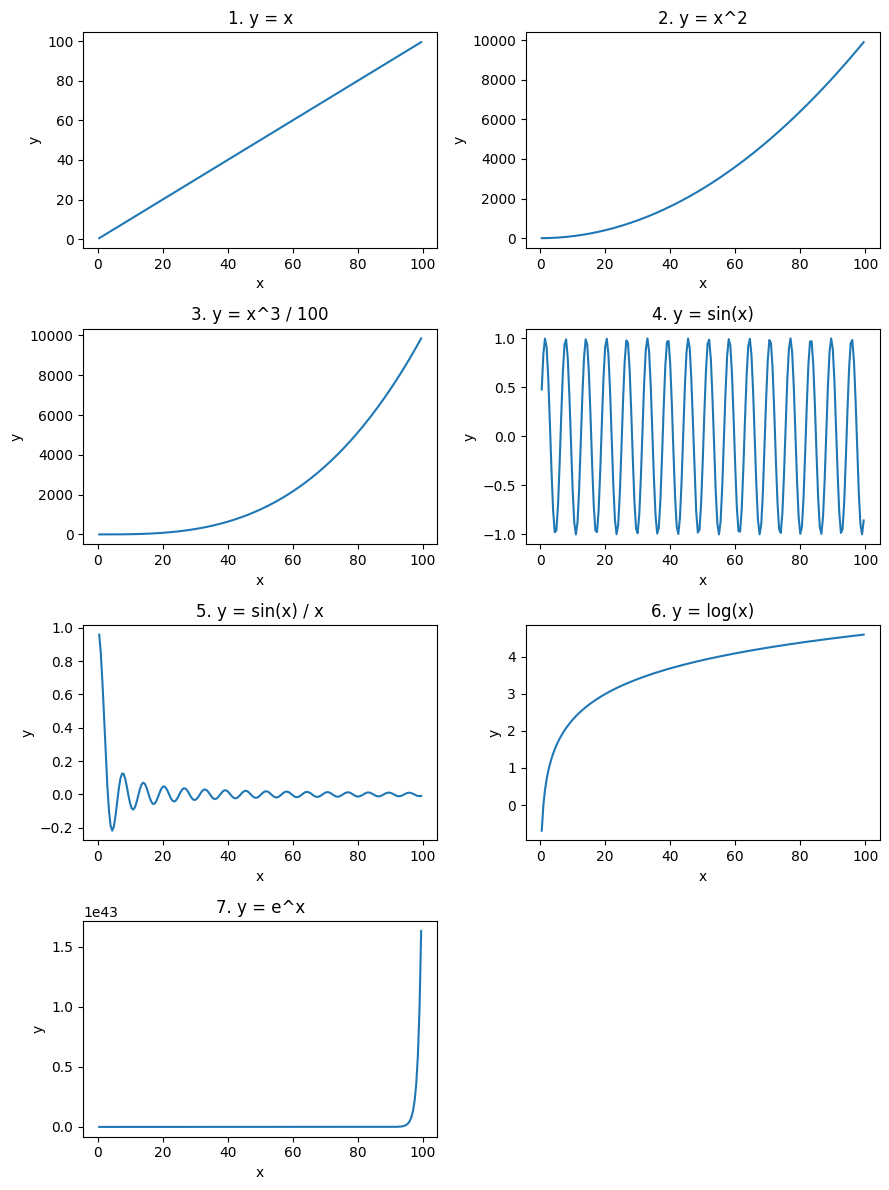

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.arange(0.5, 100, 0.5)

def plot_helper(ax, y_values):
    ax.plot(x_vals, y_values)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

fig, axs = plt.subplots(4, 2, figsize=(9,12))
axs[3][1].axis('off')

y_vals = x_vals
plot_helper(axs[0][0], y_vals)
axs[0][0].set_title('1. y = x')

y_vals = np.square(x_vals)
plot_helper(axs[0][1], y_vals)
axs[0][1].set_title('2. y = x^2')

y_vals = np.divide(np.power(x_vals, 3), 100)
plot_helper(axs[1][0], y_vals)
axs[1][0].set_title('3. y = x^3 / 100')

y_vals = np.sin(x_vals)
plot_helper(axs[1][1], y_vals)
axs[1][1].set_title('4. y = sin(x)')

y_vals = np.divide(np.sin(x_vals), x_vals)
plot_helper(axs[2][0], y_vals)
axs[2][0].set_title('5. y = sin(x) / x')

y_vals = np.log(x_vals)
plot_helper(axs[2][1], y_vals)
axs[2][1].set_title('6. y = log(x)')

y_vals = np.exp(x_vals)
plot_helper(axs[3][0], y_vals)
axs[3][0].set_title('7. y = e^x')

# y_vals = np.square(x_vals)
# ax2 = plt.subplot(422)
# ax2.plot(x_vals, y_vals)
# ax2.set_xlabel('x')
# ax2.set_ylabel('y')
# ax2.set_title('2. y = x^2')

# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('1. y = x')

# plt.legend()
plt.tight_layout()
plt.show()

### Question 10

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'a': np.random.uniform(1.0, 2.0, size=20), 'b': np.random.uniform(1.0, 2.0, size=20), 'c': np.random.uniform(1.0, 2.0, size=20),
                  'd': np.random.uniform(1.0, 2.0, size=20), 'e': np.random.uniform(1.0, 2.0, size=20)})

print("The column with max standard deviation is:", df.std().idxmax(axis=0))

# print(df.std())

print("The row with min mean is:", df.mean(axis=1).idxmin(axis=0))

# print(df.mean(axis=1))

The column with max standard deviation is: a
The row with min mean is: 7


### Question 11

In [11]:
df = pd.DataFrame({'a': np.random.uniform(1.0, 2.0, size=20), 'b': np.random.uniform(1.0, 2.0, size=20), 'c': np.random.uniform(1.0, 2.0, size=20),
                  'd': np.random.uniform(1.0, 2.0, size=20), 'e': np.random.uniform(1.0, 2.0, size=20)})

df['f'] = df.sum(axis=1)

df['g'] = df['f'].map(lambda x : "LT8" if x < 8 else "GT8")

print(df)

           a         b         c         d         e         f    g
0   1.365016  1.264652  1.458863  1.784550  1.774263  7.647344  LT8
1   1.684219  1.108684  1.080569  1.510368  1.485179  6.869018  LT8
2   1.959687  1.622205  1.725685  1.804987  1.496156  8.608720  GT8
3   1.057168  1.203100  1.480598  1.569877  1.550655  6.861398  LT8
4   1.807210  1.190002  1.157027  1.730551  1.038491  6.923282  LT8
5   1.086424  1.971962  1.715828  1.627488  1.627952  8.029654  GT8
6   1.112118  1.456672  1.121516  1.240135  1.460341  6.390783  LT8
7   1.475662  1.439729  1.036220  1.413326  1.048246  6.413184  LT8
8   1.263405  1.867299  1.517376  1.038658  1.327972  7.014710  LT8
9   1.772806  1.222425  1.758148  1.844826  1.440746  8.038952  GT8
10  1.137697  1.843344  1.942237  1.156042  1.568558  7.647878  LT8
11  1.954715  1.257952  1.417352  1.413641  1.787559  7.831219  LT8
12  1.741002  1.992656  1.093769  1.679270  1.644086  8.150782  GT8
13  1.805916  1.820899  1.500216  1.929684  1.61

### Question 12

NumPy offes broadcasting which is a feature that allows us to perform **artimetic operations** on arrays of different shapes/sizes. While performing such operations, numpy automatically broadcasts the smaller array to match the shape of the larger array (based on the rules).

General Procedure for Broadcasting: 
- NumPy compares the shape of the two arrays element-wise. It starts from rightmost dimension and proceeds towards the left end. The dimension are compatible if(either of them): 
    1. both are equal,
    2. one of them is 1 (in this case the resultant dimension will be the value of the larger one).
- If neither of the conditions are met, then the arrays are not broadcastable. 

Below is an example demonstrating the same:

In [12]:
arr1 = np.array([5, 10, 15])
arr2 = np.array([[100, 200, 300],
                 [1, 2, 3]
                ])

res = arr1 * arr2
print(res)

[[ 500 2000 4500]
 [   5   20   45]]


Here, we can see that the dimension of arr1 is: (3,) and arr2 is: (2, 3)\
````
arr1 (1D array):     3 
arr2 (2D array): 2 x 3 
res  (2D array): 2 x 3 
````

Now, although arr1 is a 1D array, it acts like an array of shape (1, 3). Then, the 3 and 3 are matched and since arr1's next dimension is 1 and that of arr2's is 2, so the resultant dimension is 2. Hence, the first row `c[:]` is copied or broadcast to every other row.
````
arr1 = [[5, 10, 15],         arr2 = [[100, 200, 300],
        [5, 10, 15] ]                [1, 2, 3]]
````
After this both the arrays are multiplied *element-wise*. 
````
res = [[5x100, 10x200, 15x300],
       [5x1, 5x2, 5x3]]
````

Such arrays are called *Broadcastable*.

In [13]:
arr1 = np.array([5, 10])
arr2 = np.array([[3, 6, 9],
                 [4, 8, 12]
                ])
res = arr1 + arr2
print(res)

ValueError: operands could not be broadcast together with shapes (2,) (2,3) 

Here, we can see that they aren't broadcastable

````
arr1 (1D array):     2 
arr2 (2D array): 2 x 3 
````
Here, the righmost dimension are unequal and neither of them is 1. 

### Question 13

In [14]:
import numpy as np

def custom_argmin(arr):
    arr_cpy = np.ravel(arr)
    
    num_ele = np.shape(arr_cpy)[0]
    
    min_ind = 0
    
    for i in range(num_ele):
        min_ind = i if arr_cpy[i] < arr_cpy[min_ind] else min_ind
    
    return min_ind
#     corrected_ind = np.unravel_index(min_ind, np.shape(arr))
    
#     return corrected_ind
    
arr = np.array([[1, 3, 0, 6], [1, 2, -1, 5]])

print("The value of argmin using np.argmin:", np.argmin(arr))

print("The value of argmin using custom argmin implementation:", custom_argmin(arr))

The value of argmin using np.argmin: 6
The value of argmin using custom argmin implementation: 6
